In [1]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 

from sklearn.metrics import r2_score
    
import os

import datetime as dt


# hide warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [2]:
# read the data
data = pd.read_csv("telecom_churn_data.csv", sep=",", encoding="ISO-8859-1", header=0)
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
# describing dataset
data.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

In [4]:
# properties of dataset
print(data.shape)
data.info()

(99999, 226)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
# backing up a copy of dataset
data_copy=data.copy()

### Unique Values in each column

In [6]:
data.nunique(dropna=False).sort_values()

circle_id                       1
last_date_of_month_6            1
std_ic_t2o_mou_6                2
std_og_t2c_mou_8                2
std_og_t2c_mou_9                2
std_ic_t2o_mou_9                2
std_ic_t2o_mou_8                2
std_og_t2c_mou_7                2
std_ic_t2o_mou_7                2
std_og_t2c_mou_6                2
loc_og_t2o_mou                  2
std_og_t2o_mou                  2
loc_ic_t2o_mou                  2
last_date_of_month_7            2
last_date_of_month_9            2
last_date_of_month_8            2
fb_user_9                       3
night_pck_user_7                3
night_pck_user_8                3
night_pck_user_9                3
night_pck_user_6                3
fb_user_8                       3
fb_user_7                       3
fb_user_6                       3
monthly_2g_9                    5
monthly_2g_6                    5
monthly_2g_7                    6
monthly_2g_8                    6
monthly_3g_9                   11
monthly_3g_6  

### <font color=red>Observation - </font>
Based on above we have columns which don't have variance and can be dropped - Circle ID, last date of the month.
Categorical variables which are Int -
    fb_user_9                       
    night_pck_user_7                
    night_pck_user_8                
    night_pck_user_9                
    night_pck_user_6                
    fb_user_8                       
    fb_user_7                       
    fb_user_6  

### Handling categorical values 

In [7]:
# all categorical excluding float and int type variables except once identified in unique analysis in the dataset
data_cat = list(data.select_dtypes(exclude=['float64', 'int64']).columns)
data_cat.extend(['fb_user_9','night_pck_user_7','night_pck_user_8','night_pck_user_9','night_pck_user_6','fb_user_8','fb_user_7','fb_user_6'])
print('\033[1m' + "Categorical Variables :" + "\033[0;0m")
print(data_cat)

Categorical Variables :
['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'fb_user_9', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'night_pck_user_6', 'fb_user_8', 'fb_user_7', 'fb_user_6']


In [8]:
# Analysis of categorical columns - 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8','last_date_of_month_9'
for i in ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8','last_date_of_month_9']:
    print('\033[1m' + "Column %s "% i  + "\033[0;0m")
    print(data[i].value_counts(dropna=False)/len(data))
    print('\033[1m' + "_"*120 + "\033[0;0m",'\n')

Column last_date_of_month_6 
6/30/2014    1.0
Name: last_date_of_month_6, dtype: float64
________________________________________________________________________________________________________________________ 

Column last_date_of_month_7 
7/31/2014    0.99399
NaN          0.00601
Name: last_date_of_month_7, dtype: float64
________________________________________________________________________________________________________________________ 

Column last_date_of_month_8 
8/31/2014    0.989
NaN          0.011
Name: last_date_of_month_8, dtype: float64
________________________________________________________________________________________________________________________ 

Column last_date_of_month_9 
9/30/2014    0.98341
NaN          0.01659
Name: last_date_of_month_9, dtype: float64
________________________________________________________________________________________________________________________ 



### <font color=red>Observation -</font>
    Following columns have no variance they just have 1 value or NULL which less than 1%. Hence these columns can be dropped.
    last_date_of_month_6
    last_date_of_month_7
    last_date_of_month_8
    last_date_of_month_9

In [9]:
# Dropping columns mentioned above
data.drop(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8','last_date_of_month_9'],axis=1,inplace=True)
data.shape

(99999, 222)

In [10]:
# Analysing categorical columns - 'date_of_last_rech_6', 'date_of_last_rech_7','date_of_last_rech_8', 'date_of_last_rech_9'
for i in ['date_of_last_rech_6', 'date_of_last_rech_7','date_of_last_rech_8', 'date_of_last_rech_9']:
    print('\033[1m' + "Column %s "% i  + "\033[0;0m")
    print(data[i].value_counts(dropna=False)/len(data))
    print('\033[1m' + "_"*120 + "\033[0;0m",'\n')

Column date_of_last_rech_6 
6/30/2014    0.169602
6/29/2014    0.129181
6/27/2014    0.111691
6/28/2014    0.094911
6/26/2014    0.055301
6/25/2014    0.048960
6/17/2014    0.041450
6/24/2014    0.041290
6/14/2014    0.038450
6/21/2014    0.037470
6/23/2014    0.029080
6/18/2014    0.027470
6/12/2014    0.025110
6/22/2014    0.023440
6/13/2014    0.021470
6/19/2014    0.020090
6/20/2014    0.018030
NaN          0.016070
6/16/2014    0.011260
6/15/2014    0.008730
6/11/2014    0.005790
6/8/2014     0.005200
6/5/2014     0.003270
6/7/2014     0.003220
6/10/2014    0.002830
6/3/2014     0.002330
6/1/2014     0.002180
6/9/2014     0.001990
6/6/2014     0.001730
6/4/2014     0.001310
6/2/2014     0.001090
Name: date_of_last_rech_6, dtype: float64
________________________________________________________________________________________________________________________ 

Column date_of_last_rech_7 
7/31/2014    0.172882
7/30/2014    0.138631
7/25/2014    0.094011
7/29/2014    0.090521
7/28/2014

In [11]:
# let us check number of recharge and total recharge amount wherever we have null values
for i in [6,7,8,9]:
    print('\033[1m' + "Column date_of_last_rech_%s "% i  + "\033[0;0m")
    print('Total number of recharge : ',data[data['date_of_last_rech_'+str(i)].isna()]['total_rech_num_'+str(i)].value_counts())
    print('Total recharge amount : ',data[data['date_of_last_rech_'+str(i)].isna()]['total_rech_amt_'+str(i)].value_counts())
    print('\033[1m' + "_"*120 + "\033[0;0m",'\n')

Column date_of_last_rech_6 
Total number of recharge :  0    1607
Name: total_rech_num_6, dtype: int64
Total recharge amount :  0    1607
Name: total_rech_amt_6, dtype: int64
________________________________________________________________________________________________________________________ 

Column date_of_last_rech_7 
Total number of recharge :  0    1767
Name: total_rech_num_7, dtype: int64
Total recharge amount :  0    1767
Name: total_rech_amt_7, dtype: int64
________________________________________________________________________________________________________________________ 

Column date_of_last_rech_8 
Total number of recharge :  0    3622
Name: total_rech_num_8, dtype: int64
Total recharge amount :  0    3622
Name: total_rech_amt_8, dtype: int64
________________________________________________________________________________________________________________________ 

Column date_of_last_rech_9 
Total number of recharge :  0    4760
Name: total_rech_num_9, dtype: int64
Tot

### <font color=red>Observation<font>
    For following columns wherever we have NULL value there was no recharge done during that period, hence we can safely impute '-1' for NULL which will categorise these records as recharge not done during that period.
    date_of_last_rech_6
    date_of_last_rech_7
    date_of_last_rech_8
    date_of_last_rech_9

In [12]:
# imputing values for above mentioned columns
for i in ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8','date_of_last_rech_9']:
    data[i].fillna(-1, inplace=True)

In [13]:
# Checking NULL values in above mentioned columns
data[['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8','date_of_last_rech_9']].isna().sum(axis=0)

date_of_last_rech_6    0
date_of_last_rech_7    0
date_of_last_rech_8    0
date_of_last_rech_9    0
dtype: int64

In [14]:
# Analysing categorical columns - 'date_of_last_rech_data_6', 'date_of_last_rech_data_7','date_of_last_rech_data_8', 'date_of_last_rech_data_9'
for i in ['date_of_last_rech_data_6', 'date_of_last_rech_data_7','date_of_last_rech_data_8', 'date_of_last_rech_data_9']:
    print('\033[1m' + "Column %s "% i  + "\033[0;0m")
    print(data[i].value_counts(dropna=False)/len(data))
    print('\033[1m' + "_"*120 + "\033[0;0m",'\n')

Column date_of_last_rech_data_6 
NaN          0.748467
6/30/2014    0.018880
6/29/2014    0.016510
6/28/2014    0.016430
6/26/2014    0.013840
6/27/2014    0.013330
6/25/2014    0.011080
6/24/2014    0.010670
6/22/2014    0.009030
6/23/2014    0.008930
6/21/2014    0.008610
6/17/2014    0.008590
6/19/2014    0.008130
6/20/2014    0.007790
6/18/2014    0.007730
6/14/2014    0.007390
6/16/2014    0.007310
6/12/2014    0.006600
6/15/2014    0.006560
6/13/2014    0.006310
6/11/2014    0.006290
6/10/2014    0.006260
6/9/2014     0.006070
6/6/2014     0.005910
6/5/2014     0.005840
6/7/2014     0.005170
6/8/2014     0.005140
6/3/2014     0.004950
6/4/2014     0.004640
6/2/2014     0.004230
6/1/2014     0.003310
Name: date_of_last_rech_data_6, dtype: float64
________________________________________________________________________________________________________________________ 

Column date_of_last_rech_data_7 
NaN          0.744287
7/31/2014    0.018130
7/29/2014    0.017190
7/30/2014    0.0

In [15]:
# let us check monthly/sachet 2g/3g recharge values
for i in [6,7,8,9]:
    print('\033[1m' + "Column date_of_last_rech_%s "% i  + "\033[0;0m")
    print('Monthly 2g : ',data[data['date_of_last_rech_data_'+str(i)].isna()]['monthly_2g_'+str(i)].value_counts())
    print('Sachet 2g : ',data[data['date_of_last_rech_data_'+str(i)].isna()]['sachet_2g_'+str(i)].value_counts())
    print('Monthly 3g : ',data[data['date_of_last_rech_data_'+str(i)].isna()]['monthly_3g_'+str(i)].value_counts())
    print('Sachet 3g : ',data[data['date_of_last_rech_data_'+str(i)].isna()]['sachet_3g_'+str(i)].value_counts())
    print('\033[1m' + "_"*120 + "\033[0;0m",'\n')

Column date_of_last_rech_6 
Monthly 2g :  0    74846
Name: monthly_2g_6, dtype: int64
Sachet 2g :  0    74846
Name: sachet_2g_6, dtype: int64
Monthly 3g :  0    74846
Name: monthly_3g_6, dtype: int64
Sachet 3g :  0    74846
Name: sachet_3g_6, dtype: int64
________________________________________________________________________________________________________________________ 

Column date_of_last_rech_7 
Monthly 2g :  0    74428
Name: monthly_2g_7, dtype: int64
Sachet 2g :  0    74428
Name: sachet_2g_7, dtype: int64
Monthly 3g :  0    74428
Name: monthly_3g_7, dtype: int64
Sachet 3g :  0    74428
Name: sachet_3g_7, dtype: int64
________________________________________________________________________________________________________________________ 

Column date_of_last_rech_8 
Monthly 2g :  0    73660
Name: monthly_2g_8, dtype: int64
Sachet 2g :  0    73660
Name: sachet_2g_8, dtype: int64
Monthly 3g :  0    73660
Name: monthly_3g_8, dtype: int64
Sachet 3g :  0    73660
Name: sachet_3g_8,

### <font color=red>Observation<font>
    For following columns wherever we have NULL value there was no data recharge done during that period, hence we can safely impute '0' for NULL which will categorise these records as data recharge not done during that period.
    date_of_last_rech_data_6
    date_of_last_rech_data_7
    date_of_last_rech_data_8
    date_of_last_rech_data_9

In [16]:
# imputing values for above mentioned columns
for i in ['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8','date_of_last_rech_data_9']:
    data[i].fillna(0, inplace=True)

In [17]:
# Checking NULL values in above mentioned columns
print(data[['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8','date_of_last_rech_data_9']].isna().sum(axis=0))
print('\033[1m' + "_"*120 + "\033[0;0m",'\n')

date_of_last_rech_data_6    0
date_of_last_rech_data_7    0
date_of_last_rech_data_8    0
date_of_last_rech_data_9    0
dtype: int64
________________________________________________________________________________________________________________________ 



In [18]:
# Analysing categorical columns 'fb_user_9','night_pck_user_7','night_pck_user_8','night_pck_user_9','night_pck_user_6','fb_user_8','fb_user_7','fb_user_6'
for i in ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9']:
    print('\033[1m' + "Column %s "% i  + "\033[0;0m")
    print(data[i].value_counts(dropna=False)/len(data))
    print('\033[1m' + "_"*120 + "\033[0;0m",'\n')

Column night_pck_user_6 
NaN     0.748467
 0.0    0.245222
 1.0    0.006310
Name: night_pck_user_6, dtype: float64
________________________________________________________________________________________________________________________ 

Column night_pck_user_7 
NaN     0.744287
 0.0    0.249822
 1.0    0.005890
Name: night_pck_user_7, dtype: float64
________________________________________________________________________________________________________________________ 

Column night_pck_user_8 
NaN     0.736607
 0.0    0.257903
 1.0    0.005490
Name: night_pck_user_8, dtype: float64
________________________________________________________________________________________________________________________ 

Column night_pck_user_9 
NaN     0.740777
 0.0    0.255083
 1.0    0.004140
Name: night_pck_user_9, dtype: float64
________________________________________________________________________________________________________________________ 

Column fb_user_6 
NaN     0.748467
 1.0    0.230

### <font color=red>Observation -</font>
    We observe that these are more like yes or no field that is whether a user is Night Pack user or Fb user. NULL values indicate that this question was not answered, hence we can impute '-1' to classify answer was not provided.

In [19]:
# imputing values for above mentioned columns
for i in ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9']:
    data[i].fillna(-1, inplace=True)

In [20]:
# Checking NULL values in above mentioned columns
print(data[['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9']].isna().sum(axis=0))
print('\033[1m' + "_"*120 + "\033[0;0m",'\n')

night_pck_user_6    0
night_pck_user_7    0
night_pck_user_8    0
night_pck_user_9    0
fb_user_6           0
fb_user_7           0
fb_user_8           0
fb_user_9           0
dtype: int64
________________________________________________________________________________________________________________________ 



### <font color=blue>Verifying NULL values in Categorical columns</font>

In [21]:
data_cat = list(data.select_dtypes(exclude=['float64', 'int64']).columns)
data_cat.extend(['fb_user_9','night_pck_user_7','night_pck_user_8','night_pck_user_9','night_pck_user_6','fb_user_8','fb_user_7','fb_user_6'])
print((data[data_cat].isnull().sum()/len(data)*100).round(2).sort_values(ascending=False))
print('\033[1m' + "_"*120 + "\033[0;0m",'\n')

fb_user_6                   0.0
fb_user_7                   0.0
fb_user_8                   0.0
night_pck_user_6            0.0
night_pck_user_9            0.0
night_pck_user_8            0.0
night_pck_user_7            0.0
fb_user_9                   0.0
date_of_last_rech_data_9    0.0
date_of_last_rech_data_8    0.0
date_of_last_rech_data_7    0.0
date_of_last_rech_data_6    0.0
date_of_last_rech_9         0.0
date_of_last_rech_8         0.0
date_of_last_rech_7         0.0
date_of_last_rech_6         0.0
dtype: float64
________________________________________________________________________________________________________________________ 



### Analysing Numerical Columns

### <font color=blue>Columns having more than 70% NULL values</font>

In [22]:
col_num_70 = data.loc[:,list(((data.isnull().sum()/len(data)*100).round(2)>70))].columns
col_num_70

Index(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9'],
      dtype='object')

In [23]:
# all these columns relate to data, let us analyse whether they have NULL values for same records for a given month.
print('\033[1m' + "Analysing for month - 6" + "\033[0;0m")
print(data[col_num_70].filter(regex=('_6')).isna().sum(axis=1).value_counts())
print('\033[1m' + "_"*120 + "\033[0;0m",'\n')

print('\033[1m' + "Analysing for month - 7" + "\033[0;0m")
print(data[col_num_70].filter(regex=('_7')).isna().sum(axis=1).value_counts())
print('\033[1m' + "_"*120 + "\033[0;0m",'\n')

print('\033[1m' + "Analysing for month - 8" + "\033[0;0m")
print(data[col_num_70].filter(regex=('_8')).isna().sum(axis=1).value_counts())
print('\033[1m' + "_"*120 + "\033[0;0m",'\n')

print('\033[1m' + "Analysing for month - 9" + "\033[0;0m")
print(data[col_num_70].filter(regex=('_9')).isna().sum(axis=1).value_counts())
print('\033[1m' + "_"*120 + "\033[0;0m",'\n')

Analysing for month - 6
7    74846
0    25153
dtype: int64
________________________________________________________________________________________________________________________ 

Analysing for month - 7
7    74428
0    25571
dtype: int64
________________________________________________________________________________________________________________________ 

Analysing for month - 8
7    73660
0    26339
dtype: int64
________________________________________________________________________________________________________________________ 

Analysing for month - 9
7    74077
0    25922
dtype: int64
________________________________________________________________________________________________________________________ 



### <font color= red>Observation - </font>
    From above it is clear that same records for same month for data have missing value which is due to the fact that data recharge was not done in that month. Hence we can safely impute 0 to indicate no data recharge was done for these records.

In [24]:
# imputing values for above mentioned columns
for i in col_num_70:
    data[i].fillna(0, inplace=True)

In [25]:
# Checking NULL values in above mentioned columns
print(data[col_num_70].isna().sum(axis=0))
print('\033[1m' + "_"*120 + "\033[0;0m",'\n')

total_rech_data_6     0
total_rech_data_7     0
total_rech_data_8     0
total_rech_data_9     0
max_rech_data_6       0
max_rech_data_7       0
max_rech_data_8       0
max_rech_data_9       0
count_rech_2g_6       0
count_rech_2g_7       0
count_rech_2g_8       0
count_rech_2g_9       0
count_rech_3g_6       0
count_rech_3g_7       0
count_rech_3g_8       0
count_rech_3g_9       0
av_rech_amt_data_6    0
av_rech_amt_data_7    0
av_rech_amt_data_8    0
av_rech_amt_data_9    0
arpu_3g_6             0
arpu_3g_7             0
arpu_3g_8             0
arpu_3g_9             0
arpu_2g_6             0
arpu_2g_7             0
arpu_2g_8             0
arpu_2g_9             0
dtype: int64
________________________________________________________________________________________________________________________ 



### <font color=blue>Columns having NULL values</font>

In [26]:
col_null = data.loc[:,list(((data.isnull().sum()/len(data)*100).round(2)>0))].columns
col_null

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8',
       ...
       'spl_ic_mou_8', 'spl_ic_mou_9', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8', 'isd_ic_mou_9', 'ic_others_6', 'ic_others_7',
       'ic_others_8', 'ic_others_9'],
      dtype='object', length=119)

In [27]:
# let us analyse all these columns on monthly basis to see whether values are NULL for same set of records
print('\033[1m' + "Analysing for month - 6" + "\033[0;0m")
print(data[col_null].filter(regex=('_6')).isna().sum(axis=1).value_counts())
print('\033[1m' + "_"*120 + "\033[0;0m",'\n')

print('\033[1m' + "Analysing for month - 7" + "\033[0;0m")
print(data[col_null].filter(regex=('_6')).isna().sum(axis=1).value_counts())
print('\033[1m' + "_"*120 + "\033[0;0m",'\n')

print('\033[1m' + "Analysing for month - 8" + "\033[0;0m")
print(data[col_null].filter(regex=('_6')).isna().sum(axis=1).value_counts())
print('\033[1m' + "_"*120 + "\033[0;0m",'\n')

print('\033[1m' + "Analysing for month - 9" + "\033[0;0m")
print(data[col_null].filter(regex=('_6')).isna().sum(axis=1).value_counts())
print('\033[1m' + "_"*120 + "\033[0;0m",'\n')

Analysing for month - 6
0     96062
29     3937
dtype: int64
________________________________________________________________________________________________________________________ 

Analysing for month - 7
0     96062
29     3937
dtype: int64
________________________________________________________________________________________________________________________ 

Analysing for month - 8
0     96062
29     3937
dtype: int64
________________________________________________________________________________________________________________________ 

Analysing for month - 9
0     96062
29     3937
dtype: int64
________________________________________________________________________________________________________________________ 



### <font color= red>Observation - </font>
    From above it is clear that same records for same month have missing value. These NULL values can be imputed with 0.

In [28]:
# imputing values for above mentioned columns
for i in data[col_null].filter(regex=('_6')).isna().columns:
    data[i].fillna(0, inplace=True)
for i in data[col_null].filter(regex=('_7')).isna().columns:
    data[i].fillna(0, inplace=True)
for i in data[col_null].filter(regex=('_8')).isna().columns:
    data[i].fillna(0, inplace=True)
for i in data[col_null].filter(regex=('_9')).isna().columns:
    data[i].fillna(0, inplace=True)

In [29]:
# Analysing columns 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou'
for i in ['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou']:
    print('\033[1m' + "Column %s "% i  + "\033[0;0m")
    print(data[i].value_counts(dropna=False)/len(data))
    print('\033[1m' + "_"*120 + "\033[0;0m",'\n')

Column loc_og_t2o_mou 
 0.0    0.98982
NaN     0.01018
Name: loc_og_t2o_mou, dtype: float64
________________________________________________________________________________________________________________________ 

Column std_og_t2o_mou 
 0.0    0.98982
NaN     0.01018
Name: std_og_t2o_mou, dtype: float64
________________________________________________________________________________________________________________________ 

Column loc_ic_t2o_mou 
 0.0    0.98982
NaN     0.01018
Name: loc_ic_t2o_mou, dtype: float64
________________________________________________________________________________________________________________________ 



### <font color=red>Observation - </font>
    We can see all values in these columns is 0 with variance of ~1%. Hence we can drop these columns.

In [30]:
# dropping columns mentioned above
data.drop(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou'],axis=1,inplace=True)
data.shape

(99999, 219)

### <font color=red>Observations:</font>
###### <font color=red>The four fields {'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'} should be named correctly  </font>

In [31]:
## renaming columns as per standard of ending with month number (6/7/8/9)'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'
data.rename(columns={'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8', 'sep_vbc_3g' : 'vbc_3g_9'}, inplace=True)

In [32]:
print('Original Dataframe Shape: ', data_copy.shape); 
print("Original Dataframe Info: \n"); data_copy.info();
print("Original Dataframe Nulls:", data_copy.isnull().sum().sum()); 
print('\033[1m' + "_"*120 + "\033[0;0m",'\n')
print('Cleaned Dataframe Shape: ', data.shape); 
print("Cleaned Dataframe Info: \n"); data.info();
print("Cleaned Dataframe Nulls:", data.isnull().sum().sum());
print('\033[1m' + "_"*120 + "\033[0;0m",'\n')

Original Dataframe Shape:  (99999, 226)
Original Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
Original Dataframe Nulls: 3594931
________________________________________________________________________________________________________________________ 

Cleaned Dataframe Shape:  (99999, 219)
Cleaned Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 219 entries, mobile_number to vbc_3g_9
dtypes: float64(176), int64(35), object(8)
memory usage: 167.1+ MB
Cleaned Dataframe Nulls: 0
________________________________________________________________________________________________________________________ 



In [33]:
# Creating copy of clean dataset
data_clean=data.copy()

In [34]:
data_clean.info()
print('\033[1m' + "_"*120 + "\033[0;0m",'\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 219 entries, mobile_number to vbc_3g_9
dtypes: float64(176), int64(35), object(8)
memory usage: 167.1+ MB
________________________________________________________________________________________________________________________ 



### <font color=red> Filter high-value customers</font>

In [35]:
#total data recharge amount = number of recharges * average recharge amount
data['total_data_rech_6'] = data.total_rech_data_6 * data.av_rech_amt_data_6
data['total_data_rech_7'] = data.total_rech_data_7 * data.av_rech_amt_data_7

In [36]:
#  total recharge amount = call recharge amount + data recharge amount
data['amt_data_6'] = data.total_rech_amt_6 + data.total_data_rech_6
data['amt_data_7'] = data.total_rech_amt_7 + data.total_data_rech_7

In [37]:
# calculate average recharge done by customer in June and July
data['av_amt_data_6_7'] = (data.amt_data_6 + data.amt_data_7)/2
# 70th percentile of the average recharge amount
cutoff=data.av_amt_data_6_7.quantile(0.7)

In [38]:
# High-value customer's data
hv_data = data.loc[data.av_amt_data_6_7 >= cutoff, :]
hv_data.reset_index(inplace=True,drop=True)

print("Number of High-Value Customers in the Dataset: %d\n"% len(hv_data))
print("Percentage High-value users in data : {}%".format(round(len(hv_data)/data.shape[0]*100),2))

Number of High-Value Customers in the Dataset: 30001

Percentage High-value users in data : 30%


### Identify Churn & Tag Churners

In [39]:
# Identify Churn
X = hv_data["total_ic_mou_9"] + hv_data["total_og_mou_9"] + hv_data["vol_2g_mb_9"] + hv_data["vol_3g_mb_9"]
hv_data["churn"] = np.where(X, 0, 1)

In [40]:
# Columns to be dropped: all columns ending with "_9" or september columns
Sep_cols = data.filter(regex=('_9')).columns
hv_data.drop(Sep_cols, axis=1, inplace=True)

print('Number of columns droped here  = ', len(Sep_cols))
print('Dataframe Shape: ', hv_data.shape);

Number of columns droped here  =  54
Dataframe Shape:  (30001, 171)


### Identify columns that have no varience & Drop

In [41]:
# Identify columns that have no varience
data_unique_count = hv_data.nunique().sort_values(ascending=False)

data_unique_count_0 = data_unique_count[data_unique_count == 0]
no_var_col = list(data_unique_count_0.index)

# Find columns with all same entries and add to drop_columns list
data_unique_count_1 = data_unique_count[data_unique_count == 1]
no_var_col += list(data_unique_count_1.index)

print('Dataframe Shape: ', hv_data.shape)
hv_data.drop(no_var_col, axis=1, inplace=True)
print('Number of columns dropped here  = ', len(no_var_col))
print('Dataframe Shape: ', hv_data.shape)

Dataframe Shape:  (30001, 171)
Number of columns dropped here  =  7
Dataframe Shape:  (30001, 164)


In [42]:
print('\033[1m' + "Churn Ratio:" + "\033[0;0m")
print(hv_data.churn.value_counts()*100/hv_data.shape[0])

Churn Ratio:
0    91.863605
1     8.136395
Name: churn, dtype: float64


### Outlier Treatment

In [43]:
hv_data.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,av_amt_data_6_7,churn
count,3.000100e+04,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,3

In [44]:
df_not_churn = hv_data[hv_data["churn"] == 0]
df_churn     = hv_data[hv_data["churn"] == 1]

### Univariate Analysis on  'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8'

Mean:
11.669738751814224
13.897582957804179
median:
9.0
11.0
Quantiles:
[ 0.  6.  9. 14.]
[ 0.  7. 11. 17.]


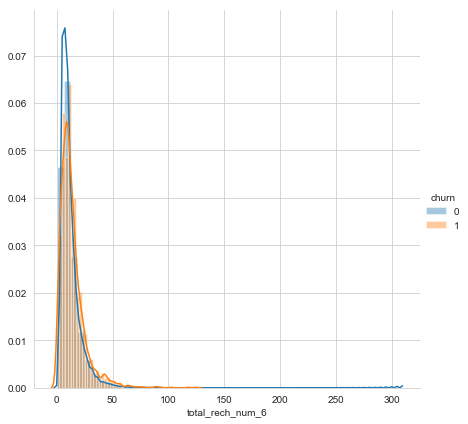

In [45]:
#calculation of mean for churn or non churn
print("Mean:")
print(np.mean(df_not_churn["total_rech_num_6"]))
print(np.mean(df_churn["total_rech_num_6"]))
print("median:")
print(np.median(df_not_churn["total_rech_num_6"]))
print(np.median(df_churn["total_rech_num_6"]))

print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_num_6"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_num_6"],np.arange(0,100,25)))

sns.set_style('whitegrid')
sns.FacetGrid(hv_data,hue='churn',size=6).map(sns.distplot,"total_rech_num_6").add_legend()

### <font color=red>Observation -</font>
    Customers irrespective of churn show almost similar characteristics for number of recharges done in the month of June.
    Churned customers did slightly less number of recharge against customers who did not churn.

Mean:
11.747496371552975
11.395329782875871
median:
9.0
9.0
Quantiles:
[ 0.  6.  9. 15.]
[ 0.  5.  9. 15.]


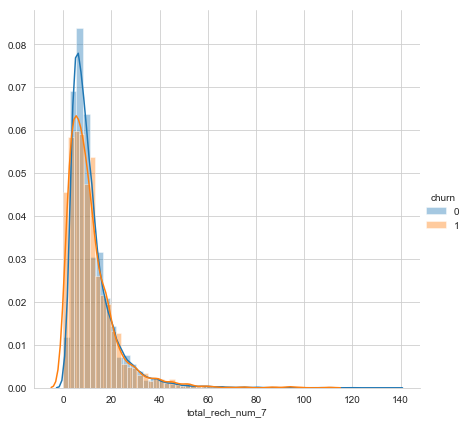

In [46]:
print("Mean:")
print(np.mean(df_not_churn["total_rech_num_7"]))
print(np.mean(df_churn["total_rech_num_7"]))
print("median:")
print(np.median(df_not_churn["total_rech_num_7"]))
print(np.median(df_churn["total_rech_num_7"]))

print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_num_7"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_num_7"],np.arange(0,100,25)))

sns.set_style('whitegrid')
sns.FacetGrid(hv_data,hue='churn',size=6).map(sns.distplot,"total_rech_num_7").add_legend()

### <font color=red>Observation -</font>
    Customers irrespective of churn show almost similar characteristics for number of recharges done in the month of July.
    Churned customers did less number of recharge against customers who did not churn.

Mean:
10.392126269956458
5.239246210569439
median:
8.0
3.0
Quantiles:
[ 0.  4.  8. 13.]
[0. 2. 3. 6.]


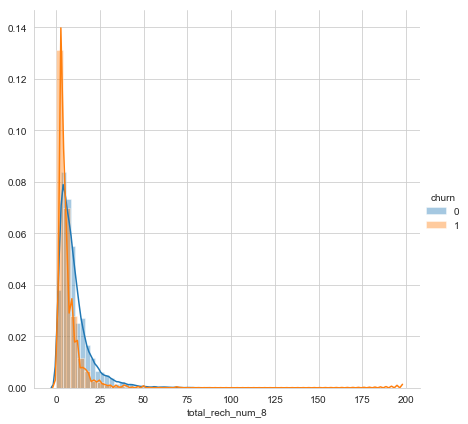

In [47]:
print("Mean:")
print(np.mean(df_not_churn["total_rech_num_8"]))
print(np.mean(df_churn["total_rech_num_8"]))
print("median:")
print(np.median(df_not_churn["total_rech_num_8"]))
print(np.median(df_churn["total_rech_num_8"]))

print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_num_8"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_num_8"],np.arange(0,100,25)))

sns.FacetGrid(hv_data,hue='churn',size=6).map(sns.distplot,"total_rech_num_8").add_legend()

### <font color=red>Observation -</font>
    Churned customers did less than 15 recharges as comapared to customers who did not churn, this can be interpreted as signal for customer churn.

### Analysis - Number of recharge for June vs July

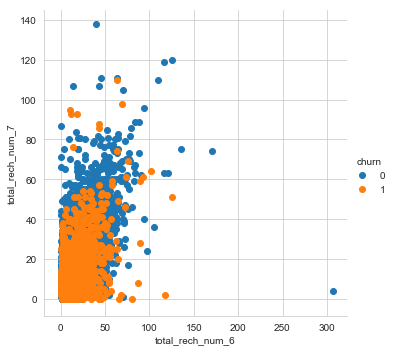

In [48]:
sns.FacetGrid(hv_data,hue='churn',size=5).map(plt.scatter,"total_rech_num_6","total_rech_num_7").add_legend()

### <font color=red>Observation -</font>
    Number of rechages done by customer irespective of churn shows positive correlation for June vs July and tend to do similar number of recharges in June and July

### Analysis - Number of recharge for July vs August

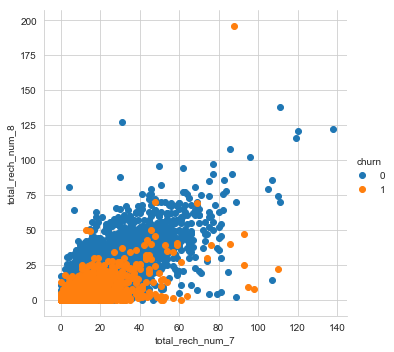

In [49]:
sns.FacetGrid(hv_data,hue='churn',size=5).map(plt.scatter,"total_rech_num_7","total_rech_num_8").add_legend()

### <font color=red>Observation -</font>
    Number of recharges done by customer in August tend to decline fron July for customers who churned against customers who did not.

### Analysis - Number of recharge for June vs August

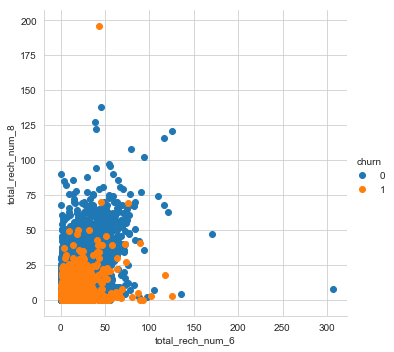

In [50]:
sns.FacetGrid(hv_data,hue='churn',size=5).map(plt.scatter,"total_rech_num_6","total_rech_num_8").add_legend()

### <font color=red>Observation -</font>
    Number of recharges done by customer in August tend to decline fron June for customers who churned against customers who did not.

### Univariate Analysis on 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',

Mean:
649.574709724238
786.7070872593199
median:
558.0
660.0
Quantiles:
[  0.   358.   558.   816.25]
[   0.  406.  660. 1002.]


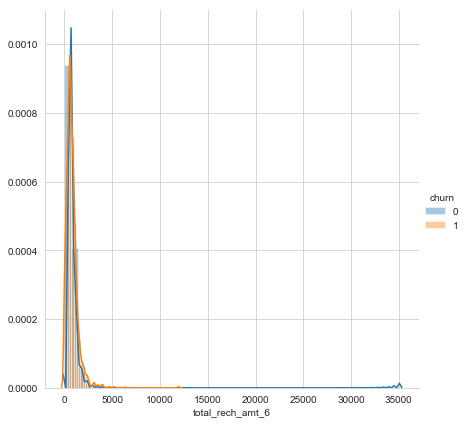

In [51]:
print("Mean:")
print(np.mean(df_not_churn["total_rech_amt_6"]))
print(np.mean(df_churn["total_rech_amt_6"]))
print("median:")
print(np.median(df_not_churn["total_rech_amt_6"]))
print(np.median(df_churn["total_rech_amt_6"]))
print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_amt_6"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_amt_6"],np.arange(0,100,25)))
sns.FacetGrid(hv_data,hue='churn',size=6).map(sns.distplot,"total_rech_amt_6").add_legend()

### <font color=red>Observation -</font>
    Customers irrespective of churn show almost similar characteristics for total amount of recharges done in the month of June. Total amount of recharges is less than 2500 for customers.

Mean:
663.5278301886792
626.2900450634986
median:
565.0
526.0
Quantiles:
[  0. 360. 565. 830.]
[  0. 242. 526. 847.]


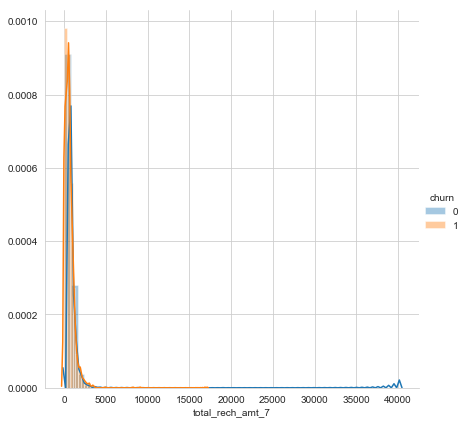

In [52]:
print("Mean:")
print(np.mean(df_not_churn["total_rech_amt_7"]))
print(np.mean(df_churn["total_rech_amt_7"]))
print("median:")
print(np.median(df_not_churn["total_rech_amt_7"]))
print(np.median(df_churn["total_rech_amt_7"]))
print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_amt_7"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_amt_7"],np.arange(0,100,25)))
sns.FacetGrid(hv_data,hue='churn',size=6).map(sns.distplot,"total_rech_amt_7").add_legend()

### <font color=red>Observation -</font>
    Churned customers did recharge of relatively more amount as compared to customers who did not churn.

Mean:
613.7010885341074
253.15280622695616
median:
510.0
45.0
Quantiles:
[  0. 280. 510. 797.]
[  0.   0.  45. 350.]


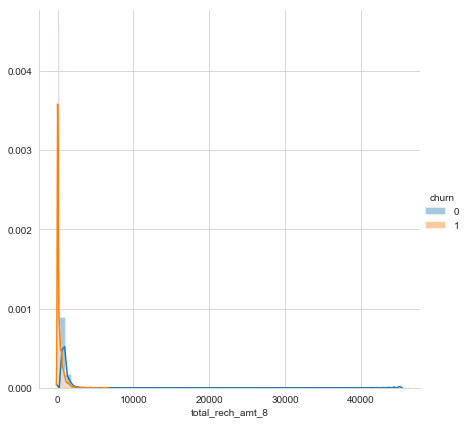

In [53]:
print("Mean:")
print(np.mean(df_not_churn["total_rech_amt_8"]))
print(np.mean(df_churn["total_rech_amt_8"]))
print("median:")
print(np.median(df_not_churn["total_rech_amt_8"]))
print(np.median(df_churn["total_rech_amt_8"]))
print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_amt_8"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_amt_8"],np.arange(0,100,25)))
sns.FacetGrid(hv_data,hue='churn',size=6).map(sns.distplot,"total_rech_amt_8").add_legend()

### <font color=red>Observation -</font>
    Majority of customers who churned did not recharge for the month of August.

### Analysis - Total amount of recharge for June vs July

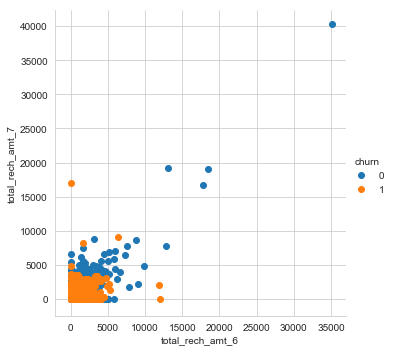

In [54]:
sns.FacetGrid(hv_data,hue='churn',size=5).map(plt.scatter,"total_rech_amt_6","total_rech_amt_7").add_legend()

### <font color=red>Observation -</font>
    No specific trend, but can observe few outliers of customers who did not churn.

### Analysis - Total amount of recharge for June vs August

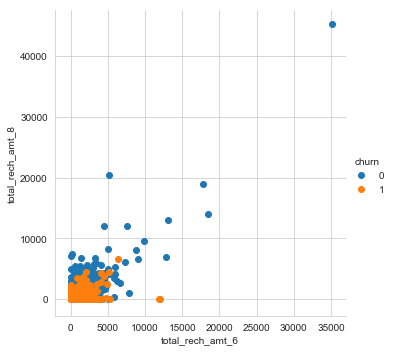

In [55]:
sns.FacetGrid(hv_data,hue='churn',size=5).map(plt.scatter,"total_rech_amt_6","total_rech_amt_8").add_legend()

### <font color=red>Observation -</font>
    No specific trend, but can observe few outliers of customers who did not churn.

### Analysis - Total amount of recharge for July vs August

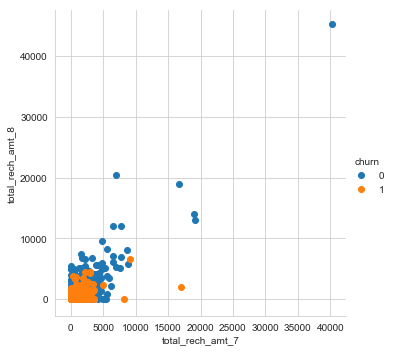

In [56]:
sns.FacetGrid(hv_data,hue='churn',size=5).map(plt.scatter,"total_rech_amt_7","total_rech_amt_8").add_legend()

### <font color=red>Observation -</font>
    No specific trend, but can observe few outliers of customers who did not churn.

### Univariate Analysis on max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8'

Mean:
169.04945573294629
171.94223678820157
median:
120.0
110.0
Quantiles:
[  0. 110. 120. 200.]
[  0.  90. 110. 198.]


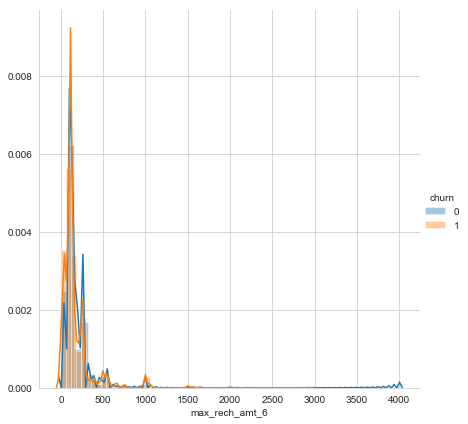

In [57]:
print("Mean:")
print(np.mean(df_not_churn["max_rech_amt_6"]))
print(np.mean(df_churn["max_rech_amt_6"]))
print("median:")
print(np.median(df_not_churn["max_rech_amt_6"]))
print(np.median(df_churn["max_rech_amt_6"]))
print("Quantiles:")
print(np.percentile(df_not_churn["max_rech_amt_6"],np.arange(0,100,25)))
print(np.percentile(df_churn["max_rech_amt_6"],np.arange(0,100,25)))
sns.FacetGrid(hv_data,hue='churn',size=6).map(sns.distplot,"max_rech_amt_6").add_legend()

### <font color=red>Observation -</font>
    Customers irrespective of churn show similar trend.

Mean:
173.33657474600872
159.38877509217534
median:
130.0
110.0
Quantiles:
[  0. 110. 130. 200.]
[  0.  50. 110. 154.]


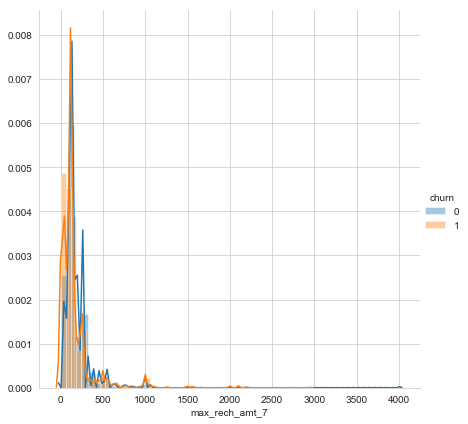

In [58]:
print("Mean:")
print(np.mean(df_not_churn["max_rech_amt_7"]))
print(np.mean(df_churn["max_rech_amt_7"]))
print("median:")
print(np.median(df_not_churn["max_rech_amt_7"]))
print(np.median(df_churn["max_rech_amt_7"]))
print("Quantiles:")
print(np.percentile(df_not_churn["max_rech_amt_7"],np.arange(0,100,25)))
print(np.percentile(df_churn["max_rech_amt_7"],np.arange(0,100,25)))
sns.FacetGrid(hv_data,hue='churn',size=6).map(sns.distplot,"max_rech_amt_7").add_legend()

### <font color=red>Observation -</font>
    Customers who churned have low maximum recharge amount as compared to ones who did not churn.

Mean:
166.76719883889695
85.37074969274887
median:
144.0
30.0
Quantiles:
[  0.  67. 144. 198.]
[  0.   0.  30. 130.]


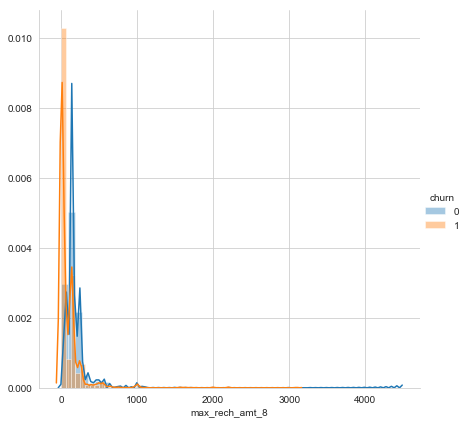

In [59]:
print("Mean:")
print(np.mean(df_not_churn["max_rech_amt_8"]))
print(np.mean(df_churn["max_rech_amt_8"]))
print("median:")
print(np.median(df_not_churn["max_rech_amt_8"]))
print(np.median(df_churn["max_rech_amt_8"]))
print("Quantiles:")
print(np.percentile(df_not_churn["max_rech_amt_8"],np.arange(0,100,25)))
print(np.percentile(df_churn["max_rech_amt_8"],np.arange(0,100,25)))
sns.FacetGrid(hv_data,hue='churn',size=6).map(sns.distplot,"max_rech_amt_8").add_legend()

### <font color=red>Observation -</font>
    Customers who churned have low maximum recharge amount as compared to ones who did not churn. Customers who churned have 0 recharge amount as well.

### Analysis - Maximum recharge amount June vs July

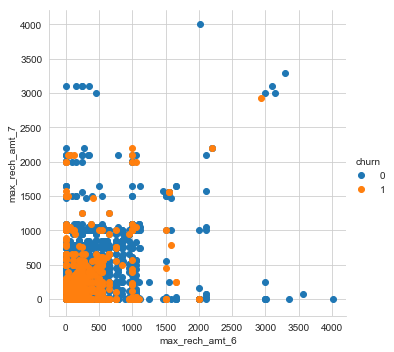

In [60]:
sns.FacetGrid(hv_data,hue='churn',size=5).map(plt.scatter,"max_rech_amt_6","max_rech_amt_7").add_legend()

### <font color=red>Observation -</font>
    Customers irrespective of churn did recharge of similar amount in June and July, we can observe few outliers as well.

### Analysis - Maximum recharge amount June vs July

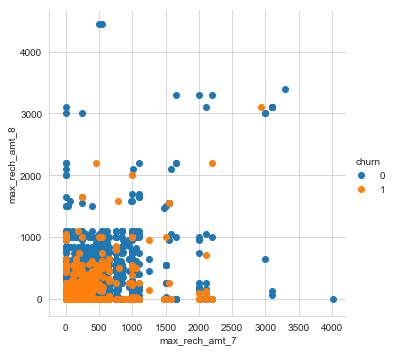

In [61]:
sns.FacetGrid(hv_data,hue='churn',size=5).map(plt.scatter,"max_rech_amt_7","max_rech_amt_8").add_legend()

### <font color=red>Observation -</font>
    Majority of customers irrespective of churn did recharge of similar amount in July and August, we can observe few outliers as well. Come of the customers who did not churn increased maximum recharge amount in August.

### Analysis - Maximum recharge amount June vs July

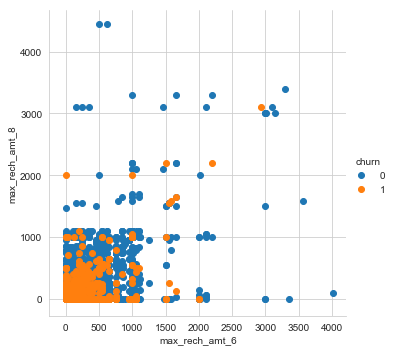

In [62]:
sns.FacetGrid(hv_data,hue='churn',size=5).map(plt.scatter,"max_rech_amt_6","max_rech_amt_8").add_legend()

### <font color=red>Observation -</font>
    Majority of customers irrespective of churn did recharge of similar amount in June and August, we can observe few outliers as well. Come of the customers who did not churn increased maximum recharge amount in August.

In [63]:
# Function for plotting
def plot_byChurnMinutes_of_Usage(colList,calltyp):
    fig, ax = plt.subplots(figsize=(7,4))
    df=hv_data.groupby(['churn'])[colList].mean().T
    plt.plot(df)
    ax.set_xticklabels(['june','july','Aug','Sept'])
    ## Add legend
    plt.legend(['Non-Churn', 'Churn'])
    # Add titles
    plt.title("Avg. "+calltyp+" MOU  V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
    plt.xlabel("Month")
    plt.ylabel("Avg. "+calltyp+" MOU")

In [64]:
# Function for plotting
def plot_byChurn(data,col):
    # per month churn vs Non-Churn
    fig, ax = plt.subplots(figsize=(7,4))
    colList=list(data.filter(regex=(col)).columns)
    colList = colList[:3]
    plt.plot(hv_data.groupby('churn')[colList].mean().T)
    ax.set_xticklabels(['june','july','Aug','Sept'])
    ## Add legend
    plt.legend(['Non-Churn', 'Churn'])
    # Add titles
    plt.title( str(col) +" V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
    plt.xlabel("Month")
    plt.ylabel(col)
    plt.show()
    # Numeric stats for per month churn vs Non-Churn
    return hv_data.groupby('churn')[colList].mean()

### Analysis - Feature: aon - Age On Network

In [65]:
# Customers distribution of the age on network
print(hv_data.aon.describe())

count    30001.000000
mean      1209.368754
std        957.677989
min        180.000000
25%        460.000000
50%        846.000000
75%       1756.000000
max       4321.000000
Name: aon, dtype: float64


### Analysis - Incoming/Outgoing MOU VS Churn

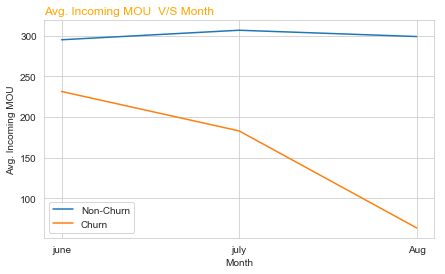

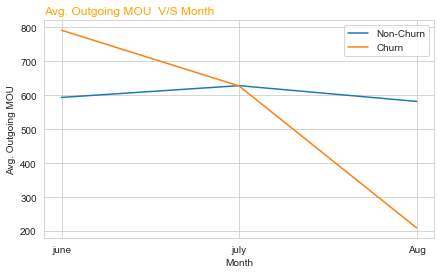

In [66]:
ic_col = ['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']
og_col = ['total_og_mou_6','total_og_mou_7','total_og_mou_8']
plot_byChurnMinutes_of_Usage(ic_col,'Incoming')
plot_byChurnMinutes_of_Usage(og_col,'Outgoing')

### <font color=red>Observation -</font>
- Customer who churned have average incoming/outgoing minutes of usage dropped steeply from July to August.
- Customers who did not churn do not show any considerable trend in average incoming/outgoing minutes of usage

From this average incoming/outgoing minutes of usage will be a considerable feature for figuring out customers who will churn.

In [67]:
# Avg.Incoming MOU per month churn vs Non-Churn
hv_data.groupby(['churn'])['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8'].mean()

,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8
churn,,,
0,295.131789,306.840677,299.096525
1,231.451344,182.907534,63.444342


In [68]:
# Avg. Outgoing MOU per month churn vs Non-Churn
hv_data.groupby(['churn'])['total_og_mou_6','total_og_mou_7','total_og_mou_8'].mean()

,total_og_mou_6,total_og_mou_7,total_og_mou_8
churn,,,
0,593.763075,628.442026,581.998003
1,791.678435,627.508218,209.361368


**Derived Column** og_to_ic_mou_6, og_to_ic_mou_7, og_to_ic_mou_8

These features will hold the **ratio** of total outgoing minutes usage per month vs total incoming minutes usage per month that is total_og_mou_* / total_ic_mou_* where * refers to month.

In [69]:
#Creating new feature: og_to_ic_mou_6, og_to_ic_mou_7, og_to_ic_mou_8
# adding 1 to denominator to avoid dividing by 0 and getting nan values.
for i in range(6,9):
    hv_data['og_to_ic_mou_'+str(i)] = (hv_data['total_og_mou_'+str(i)])/(hv_data['total_ic_mou_'+str(i)]+1)

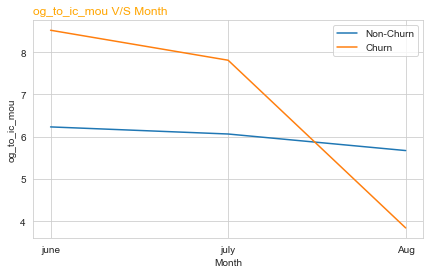

,og_to_ic_mou_6,og_to_ic_mou_7,og_to_ic_mou_8
churn,,,
0,6.232771,6.064684,5.673024
1,8.520248,7.810618,3.842356


In [70]:
plot_byChurn(hv_data,'og_to_ic_mou')

### <font color=red>Observation -</font>
- Customers who churned shows steep drop in minutes of usage from July to August.
- Customers who did not churn do not show any abrupt trend in minutes of usage

This feature can be considered key feature in identyfying customers who might churn

Derived Columns: loc_og_to_ic_mou_6, loc_og_to_ic_mou_7, loc_og_to_ic_mou_8

These features will hold the **ratio** of local outgoing minutes of usage to local incoming minutes of usage that is loc_og_mou_* / loc_ic_mou_* where * denotes the month.

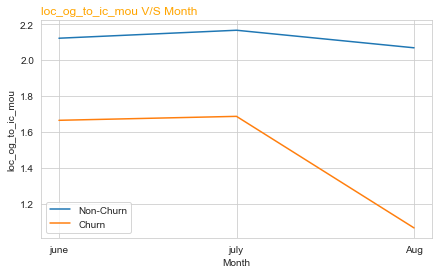

,loc_og_to_ic_mou_6,loc_og_to_ic_mou_7,loc_og_to_ic_mou_8
churn,,,
0,2.121454,2.165918,2.068068
1,1.663975,1.685986,1.064218


In [71]:
#Create new feature: loc_og_to_ic_mou_6, loc_og_to_ic_mou_7, loc_og_to_ic_mou_8
for i in range(6,9):
    hv_data['loc_og_to_ic_mou_'+str(i)] = (hv_data['loc_og_mou_'+str(i)])/(hv_data['loc_ic_mou_'+str(i)]+1)

plot_byChurn(hv_data,'loc_og_to_ic_mou')

### <font color=red>Observation -</font>
- Customers who churned shows steep decrease in miutes of usage of local outgoing to incoming call minutes of usage ratio
- For customers who did not churn show no such abrupt trend in this feature.

This feature can be considered for identyfying churn customers.

### Analysis - Total data volume VS Churn 

In [72]:
#Creating new feature: 'vol_data_mb_6', 'vol_data_mb_7', 'vol_data_mb_8'
for i in range(6,9):
    hv_data['vol_data_mb_'+str(i)] = (hv_data['vol_2g_mb_'+str(i)]+hv_data['vol_3g_mb_'+str(i)]).astype(int)

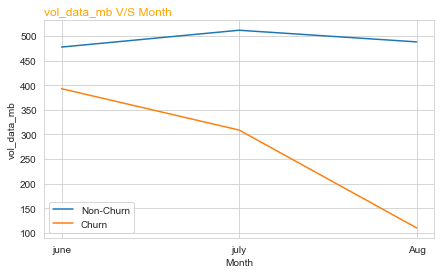

,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8
churn,,,
0,477.396226,511.506894,487.874238
1,392.945514,309.012290,110.481770


In [73]:
plot_byChurn(hv_data,'vol_data_mb')

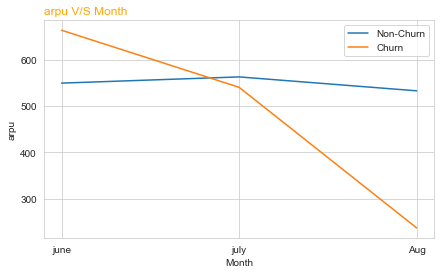

,arpu_6,arpu_7,arpu_8
churn,,,
0,549.220390,562.608191,532.635710
1,663.158246,540.165968,237.200793


In [74]:
plot_byChurn(hv_data,'arpu')

### <font color=red>Observation -</font>
- For customers who churned showed steep decrease in average revenue from july to august.
- Average revenue for customers who did not churn stayed more or less same.

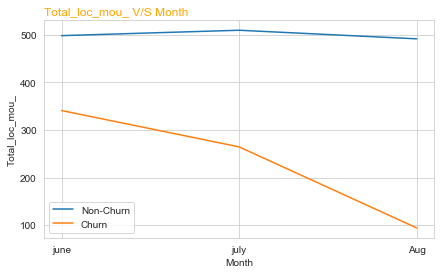

,Total_loc_mou_6,Total_loc_mou_7,Total_loc_mou_8
churn,,,
0,498.038143,509.358022,491.312215
1,340.671422,264.356186,94.092556


In [75]:
#Create new feature: Total_loc_mou_6,Total_loc_mou_7,lTotal_loc_mou_8
for i in range(6,9):
    hv_data['Total_loc_mou_'+str(i)] = (hv_data['loc_og_mou_'+str(i)])+(hv_data['loc_ic_mou_'+str(i)])

plot_byChurn(hv_data,'Total_loc_mou_')

### <font color=red>Observation -</font>
- Customers who churned had lower local call minutes of usage as compared to customers who did not.
- Customers who churned showed steep decline in local call minutes of usage.
- Customers who did not churn did not show any significant decline or spike in local minutes of usage.

Reviewing this feature can definitely give insights to probability of whether customer will churn or not.

### Derived features: Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8
    These features will refer to Total roaming Minutes of Usage that is roam_ic_mou + roam_og_mou
    This feature will identify trends in roaming minutes of usage of customer both for incoming and outgoing for each month nd can be utilized to identify likelihood of customer to churn.

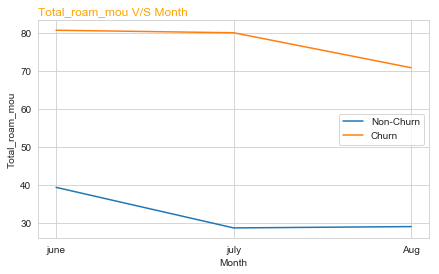

,Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8
churn,,,
0,39.309139,28.604839,28.955369
1,80.761930,80.098779,70.875625


In [76]:
#Derived feature: Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8
for i in range(6,9):
    hv_data['Total_roam_mou_'+str(i)] = (hv_data['roam_ic_mou_'+str(i)])+(hv_data['roam_og_mou_'+str(i)])

plot_byChurn(hv_data,'Total_roam_mou')

### <font color=red>Observation -</font>
- Customer who churned have high roaming usage as compared to customer who did not churn, this trend is common across all months.
- This might indicate customers who travel a lot are more likely to churn.

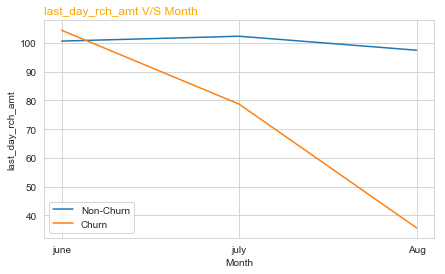

,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8
churn,,,
0,100.586938,102.275508,97.416800
1,104.356002,78.684146,35.680049


In [77]:
plot_byChurn(hv_data,'last_day_rch_amt')

### <font color=red>Observation -</font>
- Last day recharge amount consistently drop for customers who churned while it stays more or less static for customers who did not churn.

### Handling categorical columns

In [78]:
print(list(hv_data.select_dtypes(exclude=['float64', 'int64']).columns))

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'churn', 'vol_data_mb_6', 'vol_data_mb_7', 'vol_data_mb_8']


In [79]:
# change churn to numeric
hv_data['churn'] = pd.to_numeric(hv_data['churn'])

### <font color=red>Instead of converting these date columns to datetime lets convert these columns to day of month</font>

In [80]:
for i in ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']:
    hv_data[i] = pd.to_datetime(data[i])
    hv_data[i] = hv_data[i].dt.day

In [81]:
print(hv_data.groupby('night_pck_user_6').churn.mean())
print('\033[1m' + "_"*120 + "\033[0;0m",'\n')
print(hv_data.groupby('night_pck_user_7').churn.mean())
print('\033[1m' + "_"*120 + "\033[0;0m",'\n')
print(hv_data.groupby('night_pck_user_8').churn.mean())
print('\033[1m' + "_"*120 + "\033[0;0m",'\n')
print(hv_data.groupby('fb_user_6').churn.mean())
print('\033[1m' + "_"*120 + "\033[0;0m",'\n')
print(hv_data.groupby('fb_user_7').churn.mean())
print('\033[1m' + "_"*120 + "\033[0;0m",'\n')
print(hv_data.groupby('fb_user_8').churn.mean())
print('\033[1m' + "_"*120 + "\033[0;0m",'\n')

night_pck_user_6
-1.0    0.098754
 0.0    0.066977
 1.0    0.093366
Name: churn, dtype: float64
________________________________________________________________________________________________________________________ 

night_pck_user_7
-1.0    0.114802
 0.0    0.055869
 1.0    0.061333
Name: churn, dtype: float64
________________________________________________________________________________________________________________________ 

night_pck_user_8
-1.0    0.141088
 0.0    0.028824
 1.0    0.026393
Name: churn, dtype: float64
________________________________________________________________________________________________________________________ 

fb_user_6
-1.0    0.098754
 0.0    0.077173
 1.0    0.066860
Name: churn, dtype: float64
________________________________________________________________________________________________________________________ 

fb_user_7
-1.0    0.114802
 0.0    0.065918
 1.0    0.055146
Name: churn, dtype: float64
__________________________________________

In [82]:
# replace categories with aggregated values in each categorical column
mapping = {'night_pck_user_6' : {-1: 0.098754, 0: 0.066977, 1: 0.093366},
           'night_pck_user_7' : {-1: 0.114802, 0: 0.055869, 1: 0.061333},
           'night_pck_user_8' : {-1: 0.141088, 0: 0.028824, 1: 0.026393},
           'fb_user_6'        : {-1: 0.098754, 0: 0.077173, 1: 0.066860},
           'fb_user_7'        : {-1: 0.114802, 0: 0.065918, 1: 0.055146},
           'fb_user_8'        : {-1: 0.141088, 0: 0.067683, 1: 0.024314}
          }
hv_data.replace(mapping, inplace = True)

In [83]:
hv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Columns: 179 entries, mobile_number to Total_roam_mou_8
dtypes: float64(143), int32(4), int64(32)
memory usage: 40.5 MB


# Modelling

In [84]:
# import required libraries for Modelling
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import sklearn.preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [85]:
# Create X (independent variable) & y (dependent variable) 
X = hv_data.drop(['churn','mobile_number'], axis=1)
y = hv_data['churn']
X.shape

(30001, 177)

### Data Standardization/Normalization

In [86]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

### Split Data into Train & Test

In [87]:
# Split in train & Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=100)

print("X_train Dataframe Shape {}".format(X_train.shape))
print("X_test Dataframe Shape {}".format(X_test.shape))

X_train Dataframe Shape (21000, 177)
X_test Dataframe Shape (9001, 177)


In [88]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [89]:
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [90]:
#explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       11.63
1       20.82
2       27.16
3       32.13
4       35.66
5       39.02
6       41.81
7       44.39
8       46.79
9       49.13
10      51.21
11      53.08
12      54.89
13      56.60
14      58.25
15      59.85
16      61.29
17      62.68
18      64.04
19      65.33
20      66.57
21      67.77
22      68.94
23      70.00
24      71.03
25      72.04
26      72.96
27      73.85
28      74.72
29      75.51
30      76.29
31      77.06
32      77.79
33      78.50
34      79.17
35      79.83
36      80.47
37      81.06
38      81.63
39      82.19
40      82.75
41      83.28
42      83.82
43      84.33
44      84.82
45      85.30
46      85.77
47      86.23
48      86.69
49      87.12
50      87.56
51      87.98
52      88.40
53      88.80
54      89.19
55      89.57
56      89.93
57      90.29
58      90.64
59      90.95
60      91.24
61      91.52
62      91.80
63      92.07
64      92.33
65      92.58
66      92.83
67      93.08
68      93.32
69      93.56
70      93.79
71    

### <font color=red>Observation -</font>
~ 57 components explain 90% variance

~ 77 components explain 95% variance

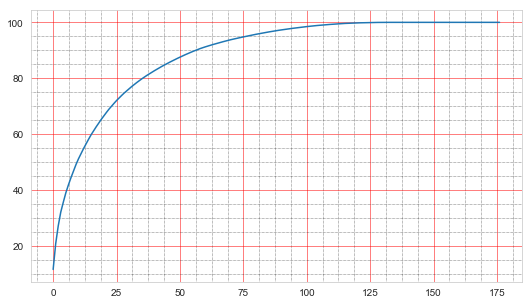

In [91]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(176/20,100/20)) # 100 elements on y-axis; 176 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)
# Turn on the minor TICKS, which are required for the minor GRID
plt.minorticks_on()

# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### For modelling considering 95% variance which is achieved with 77 components.

In [92]:
#Using incremental PCA for efficiency 
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=77)

In [93]:
X_train_1, X_test_1, y_train_1, y_test_1 = X_train.copy() , X_test.copy(), y_train.copy(), y_test.copy()

In [94]:
X_train_pca = pca_final.fit_transform(X_train)
X_train_pca.shape

(21000, 77)

In [95]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.0678936788028483 , min corr:  -0.053380208289575244


In [96]:
#Applying selected components to the test data - 77 components
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(9001, 77)

### For the prediction of churn customers we will be fitting variety of models and select one which is the best predictor of churn. Models trained are,
    1. Logistic Regression
    2. Decision Tree
    3. Random Forest
    4. Boosting models - Gradient Boosting Classifier and XGBoost Classifier

In [97]:
# Function to plor ROC
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [98]:
# Function to get model metrics
def getModelMetrics(actual_churn=False,pred_churn=False):

    confusion = metrics.confusion_matrix(actual_churn, pred_churn)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    print("Roc_auc_score : {}".format(metrics.roc_auc_score(actual_churn,pred_churn)))
    # Let's see the sensitivity of our logistic regression model
    print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
    # Let us calculate specificity
    print('Specificity: {}'.format(TN / float(TN+FP)))
    # Calculate false postive rate - predicting churn when customer does not have churned
    print('False Positive Rate: {}'.format(FP/ float(TN+FP)))
    # positive predictive value 
    print('Positive predictive value: {}'.format(TP / float(TP+FP)))
    # Negative predictive value
    print('Negative Predictive value: {}'.format(TN / float(TN+ FN)))
    # sklearn precision score value 
    print('sklearn precision score value: {}'.format(metrics.precision_score(actual_churn, pred_churn )))
    

In [99]:
def predictChurnWithProb(model,X,y,prob):
    # Funtion to predict the churn using the input probability cut-off
    # Input arguments: model instance, x and y to predict using model and cut-off probability
    
    # predict
    pred_probs = model.predict_proba(X)[:,1]
    
    y_df= pd.DataFrame({'churn':y, 'churn_Prob':pred_probs})
    # Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
    y_df['final_predicted'] = y_df.churn_Prob.map( lambda x: 1 if x > prob else 0)
    # Let's see the head
    getModelMetrics(y_df.churn,y_df.final_predicted)
    return y_df

In [100]:
def findOptimalCutoff(df):
    #Function to find the optimal cutoff for classifing as churn/non-churn
    # Let's create columns with different probability cutoffs 
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df[i] = df.churn_Prob.map( lambda x: 1 if x > i else 0)
    #print(df.head())
    
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    from sklearn.metrics import confusion_matrix
    
    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives
    
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(df.churn, df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    plt.figure(figsize=(10,10))
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    # Turn on the minor TICKS, which are required for the minor GRID
    plt.minorticks_on()

    # Customize the major grid
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
    # Customize the minor grid
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    plt.show()

In [101]:
def modelfit(alg, X_train, y_train, performCV=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, X_train, y_train, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train, dtrain_predictions))
    print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

### 1. Logistic Regression

##### Applying Logistic Regression on our principal components

In [102]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr0 = LogisticRegression(class_weight='balanced')

In [103]:
modelfit(lr0, X_train_pca, y_train)


Model Report
Accuracy : 0.8233
Recall/Sensitivity : 0.835
AUC Score (Train): 0.895850
CV Score : Mean - 0.8868958 | Std - 0.005926836 | Min - 0.875899 | Max - 0.8926199


In [104]:
# predictions on Test data
pred_probs_test = lr0.predict(X_test_pca)
getModelMetrics(y_test,pred_probs_test)

Roc_auc_score : 0.8264350987759059
Sensitivity/Recall : 0.832
Specificity: 0.8208701975518119
False Positive Rate: 0.1791298024481881
Positive predictive value: 0.29686013320647003
Negative Predictive value: 0.9817364835483403
sklearn precision score value: 0.29686013320647003


In [105]:
print("Accuracy : {}".format(metrics.accuracy_score(y_test,pred_probs_test)))
print("Recall : {}".format(metrics.recall_score(y_test,pred_probs_test)))
print("Precision : {}".format(metrics.precision_score(y_test,pred_probs_test)))

Accuracy : 0.8217975780468837
Recall : 0.832
Precision : 0.29686013320647003


In [106]:
#Making prediction on the test data
pred_probs_train = lr0.predict_proba(X_train_pca)[:,1]
print("roc_auc_score(Train) {:2.2}".format(metrics.roc_auc_score(y_train, pred_probs_train)))

roc_auc_score(Train) 0.9


In [107]:
cut_off_prob=0.5
y_train_df = predictChurnWithProb(lr0,X_train_pca,y_train,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8233255549305378
Sensitivity/Recall : 0.8350088704908338
Specificity: 0.8116422393702418
False Positive Rate: 0.18835776062975815
Positive predictive value: 0.2796593384828679
Negative Predictive value: 0.9825089336091781
sklearn precision score value: 0.2796593384828679


,churn,churn_Prob,final_predicted
11785,0,0.526797,1
11987,0,0.086601,0
11648,0,0.305841,0
12890,0,0.000057,0
3762,0,0.063138,0


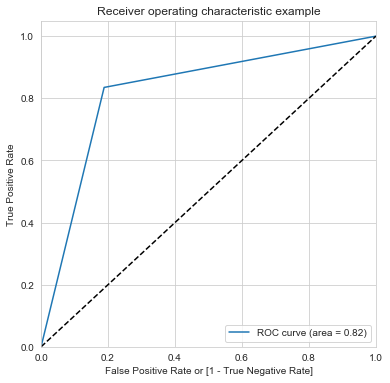

(array([0.        , 0.18835776, 1.        ]),
 array([0.        , 0.83500887, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [108]:
draw_roc(y_train_df.churn, y_train_df.final_predicted)

In [109]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(y_train_df.churn, y_train_df.final_predicted)))

roc_auc_score : 0.82


### Finding Optimal Cutoff Point
Since recall or sensitivity is a much more important metrics for churn prediction. A trade off between sensitivity(or recall) and specificity is to be considered in doing so. We will try adjusting the probability threshold which shall lead to higher sensitivity or recall rate.

     prob  accuracy     sensi     speci
0.0   0.0  0.080524  1.000000  0.000000
0.1   0.1  0.410429  0.974571  0.361023
0.2   0.2  0.561048  0.949143  0.527060
0.3   0.3  0.665048  0.926671  0.642136
0.4   0.4  0.746857  0.887049  0.734580
0.5   0.5  0.813524  0.835009  0.811642
0.6   0.6  0.863381  0.773507  0.871252
0.7   0.7  0.899048  0.696038  0.916826
0.8   0.8  0.922286  0.570668  0.953079
0.9   0.9  0.926381  0.254287  0.985240


<Figure size 720x720 with 0 Axes>

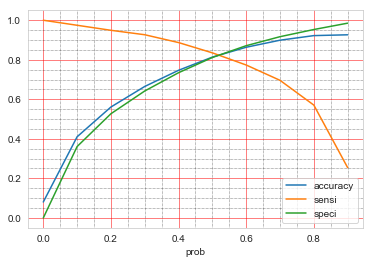

In [110]:
# finding cut-off with the right balance of the metrices
# sensitivity vs specificity trade-off
findOptimalCutoff(y_train_df)

#### **From the curve above, 0.52 is the optimum point .**

In [111]:
# predicting with the choosen cut-off on train
cut_off_prob = 0.52
predictChurnWithProb(lr0,X_train_pca,y_train,cut_off_prob)

Roc_auc_score : 0.8242029260568245
Sensitivity/Recall : 0.8249556475458308
Specificity: 0.8234502045678181
False Positive Rate: 0.17654979543218188
Positive predictive value: 0.29038301415487094
Negative Predictive value: 0.9817238824401087
sklearn precision score value: 0.29038301415487094


,churn,churn_Prob,final_predicted
11785,0,5.267966e-01,1
11987,0,8.660133e-02,0
11648,0,3.058412e-01,0
12890,0,5.670997e-05,0
3762,0,6.313767e-02,0
10072,0,4.449887e-02,0
15584,0,1.700272e-01,0
5067,0,5.827484e-02,0
16450,0,2.125302e-01,0
10103,0,4.522861e-01,0


In [112]:
# predicting with the choosen cut-off on test
predictChurnWithProb(lr0,X_test_pca,y_test,cut_off_prob)

Roc_auc_score : 0.8257071062093483
Sensitivity/Recall : 0.8186666666666667
Specificity: 0.83274754575203
False Positive Rate: 0.16725245424796994
Positive predictive value: 0.30792377131394183
Negative Predictive value: 0.9805908377336949
sklearn precision score value: 0.30792377131394183


,churn,churn_Prob,final_predicted
6102,1,0.676743,1
2539,1,0.484233,0
21576,0,0.104356,0
19574,0,0.326773,0
12804,1,0.899292,1
24030,0,0.086941,0
20273,0,0.200203,0
7538,0,0.073182,0
3196,0,0.069076,0
12935,0,0.456168,0


### <font color=blue> Final model after PCA and logistic regression (with optimal cutoff setting).</font>
- **train sensitivity  :** 82.5%, **train roc auc score  :** 82.4%  , ** Specificity : ** 82.3%
- **test sensitivity   :** 81.8%, **test roc auc score  :** 82.6%  , ** Specificity : ** 83.3%

### 2. Decision Tree

In [113]:
dt0 = DecisionTreeClassifier(class_weight='balanced',
                             max_features='auto',
                             min_samples_split=100,
                             min_samples_leaf=100,
                             max_depth=6,
                             random_state=10)
modelfit(dt0, X_train_pca, y_train)


Model Report
Accuracy : 0.7641
Recall/Sensitivity : 0.7493
AUC Score (Train): 0.822926
CV Score : Mean - 0.7790401 | Std - 0.01249813 | Min - 0.7636859 | Max - 0.7965206


In [114]:
# make predictions
pred_probs_test = dt0.predict(X_test_pca)
#Let's check the model metrices.
getModelMetrics(actual_churn=y_test,pred_churn=pred_probs_test)

Roc_auc_score : 0.7453465842524138
Sensitivity/Recall : 0.7093333333333334
Specificity: 0.7813598351714943
False Positive Rate: 0.21864016482850562
Positive predictive value: 0.22773972602739725
Negative Predictive value: 0.9672918229557389
sklearn precision score value: 0.22773972602739725


In [115]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(5,15,3),
    'min_samples_leaf': range(100, 400, 50),
    'min_samples_split': range(100, 400, 100),
    'max_features': [8,10,15]
}
# Create a based model
dt = DecisionTreeClassifier(class_weight='balanced',random_state=10)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 3, n_jobs = 4,verbose = 1,scoring="f1_weighted")

In [116]:
# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   10.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   22.2s
[Parallel(n_jobs=4)]: Done 648 out of 648 | elapsed:   32.5s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'max_depth': range(5, 15, 3), 'min_samples_leaf': range(100, 400, 50), 'min_samples_split': range(100, 400, 100), 'max_features': [8, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_weighted', verbose=1)

In [117]:
# printing the optimal accuracy score and hyperparameters
print('We can get recall of',grid_search.best_score_,'using',grid_search.best_params_)

We can get recall of 0.8215488454524621 using {'max_depth': 5, 'max_features': 15, 'min_samples_leaf': 250, 'min_samples_split': 100}


In [118]:
# model with the best hyperparameters
dt_final = DecisionTreeClassifier(class_weight='balanced',
                             max_depth=5,
                             min_samples_leaf=250, 
                             min_samples_split=100,
                             max_features=15,
                             random_state=10)

In [119]:
modelfit(dt_final,X_train_pca,y_train)


Model Report
Accuracy : 0.7522
Recall/Sensitivity : 0.7771
AUC Score (Train): 0.819258
CV Score : Mean - 0.7838865 | Std - 0.009973327 | Min - 0.7642727 | Max - 0.7913873


In [120]:
# make predictions
pred_probs_test = dt_final.predict(X_test_pca)
#Let's check the model metrices.
getModelMetrics(actual_churn=y_test,pred_churn=pred_probs_test)

Roc_auc_score : 0.7321981981981981
Sensitivity/Recall : 0.7346666666666667
Specificity: 0.7297297297297297
False Positive Rate: 0.2702702702702703
Positive predictive value: 0.19813016900395541
Negative Predictive value: 0.9680064308681672
sklearn precision score value: 0.19813016900395541


In [121]:
# classification report
print(classification_report(y_test,pred_probs_test))

              precision    recall  f1-score   support

           0       0.97      0.73      0.83      8251
           1       0.20      0.73      0.31       750

   micro avg       0.73      0.73      0.73      9001
   macro avg       0.58      0.73      0.57      9001
weighted avg       0.90      0.73      0.79      9001



In [122]:
# predicting churn with default cut-off 0.5
cut_off_prob = 0.5
y_train_df = predictChurnWithProb(dt_final,X_train_pca,y_train,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.7522439001995589
Sensitivity/Recall : 0.7770549970431697
Specificity: 0.727432803355948
False Positive Rate: 0.272567196644052
Positive predictive value: 0.1997871369925498
Negative Predictive value: 0.9738611939263676
sklearn precision score value: 0.1997871369925498


,churn,churn_Prob,final_predicted
11785,0,0.332388,0
11987,0,0.039808,0
11648,0,0.271322,0
12890,0,0.801116,1
3762,0,0.194216,0


     prob  accuracy     sensi     speci
0.0   0.0  0.080524  1.000000  0.000000
0.1   0.1  0.206333  0.994086  0.137345
0.2   0.2  0.380095  0.950325  0.330157
0.3   0.3  0.552381  0.884092  0.523331
0.4   0.4  0.720524  0.785925  0.714796
0.5   0.5  0.731429  0.777055  0.727433
0.6   0.6  0.808190  0.665287  0.820705
0.7   0.7  0.859143  0.549970  0.886219
0.8   0.8  0.897429  0.392667  0.941633
0.9   0.9  0.919476  0.000000  1.000000


<Figure size 720x720 with 0 Axes>

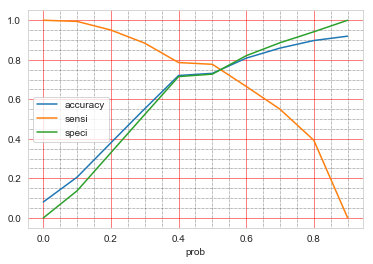

In [123]:
# finding cut-off with the right balance of the metrices
findOptimalCutoff(y_train_df)

In [124]:
# predicting churn with cut-off 0.52
cut_off_prob=0.52
y_train_df = predictChurnWithProb(dt_final,X_train_pca,y_train,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.7515241327669931
Sensitivity/Recall : 0.7392075694855116
Specificity: 0.7638406960484748
False Positive Rate: 0.2361593039515252
Positive predictive value: 0.21514629948364888
Negative Predictive value: 0.9709677419354839
sklearn precision score value: 0.21514629948364888


,churn,churn_Prob,final_predicted
11785,0,0.332388,0
11987,0,0.039808,0
11648,0,0.271322,0
12890,0,0.801116,1
3762,0,0.194216,0


In [125]:
#Lets see how it performs on test data.
y_test_df= predictChurnWithProb(dt_final,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.7330447218518967
Sensitivity/Recall : 0.704
Specificity: 0.7620894437037935
False Positive Rate: 0.23791055629620653
Positive predictive value: 0.21196306704134885
Negative Predictive value: 0.9658986175115207
sklearn precision score value: 0.21196306704134885


,churn,churn_Prob,final_predicted
6102,1,0.764204,1
2539,1,0.271322,0
21576,0,0.194216,0
19574,0,0.211855,0
12804,1,0.382149,0


### <font color=blue> Final model after Decison Tree (with optimal cutoff setting).</font>
- **train sensitivity  :** 73.9%, **train roc auc score  :** 75.1%  , ** Specificity : ** 76.4%
- **test sensitivity   :** 70.4%, **test roc auc score  :** 73.3%  , ** Specificity : ** 76.2%

### 3. Random Forest

### Tuning max_depth

In [126]:
parameters = {'max_depth': range(10, 30, 5)}
rf0 = RandomForestClassifier()
rfgs = GridSearchCV(rf0, parameters, 
                    cv=5, 
                   scoring="recall",
                   return_train_score=True)
rfgs.fit(X_train_pca,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(10, 30, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='recall', verbose=0)

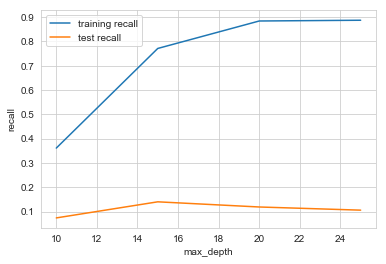

In [127]:
scores = rfgs.cv_results_
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("recall")
plt.legend()
plt.show()

### Test recall-score has maximum value at max_depth=15

In [128]:
def plot_traintestAcc(score,param):
    scores = score
    plt.figure()
    plt.plot(scores["param_"+param], 
    scores["mean_train_score"], 
    label="training recall")
    plt.plot(scores["param_"+param], 
    scores["mean_test_score"], 
    label="test recall")
    plt.xlabel(param)
    plt.ylabel("recall")
    plt.legend()
    plt.show()

#### Tuning n_estimators

In [129]:
parameters = {'n_estimators': range(50, 150, 25)}
rf1 = RandomForestClassifier(max_depth=4)
rfgs = GridSearchCV(rf1, parameters, 
                    cv=3, 
                   scoring="recall",
                   return_train_score=True)

In [130]:
rfgs.fit(X_train_pca,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(50, 150, 25)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=0)

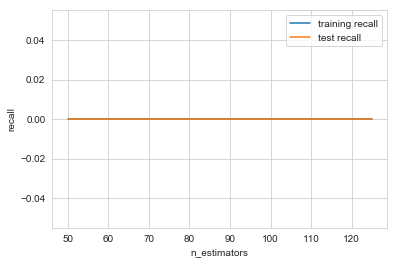

In [131]:
plot_traintestAcc(rfgs.cv_results_,'n_estimators')

In [132]:
parameters = {'n_estimators': range(100, 1500, 400)}
rf11 = RandomForestClassifier(max_depth=4)
rfgs = GridSearchCV(rf11, parameters, 
                    cv=3, 
                   scoring="recall",
                   return_train_score=True)

In [133]:
rfgs.fit(X_train_pca,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(100, 1500, 400)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=0)

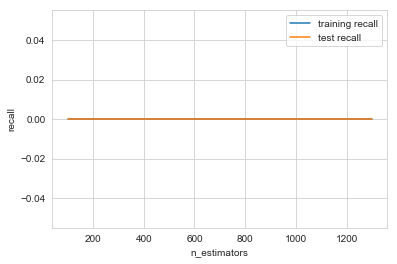

In [134]:
plot_traintestAcc(rfgs.cv_results_,'n_estimators')

#### Tuning max_features

In [135]:
parameters = {'max_features': [4, 8, 14, 20, 24]}
rf3 = RandomForestClassifier(max_depth=4)
rfgs = GridSearchCV(rf3, parameters, 
                    cv=5, 
                   scoring="recall",
                   return_train_score=True)

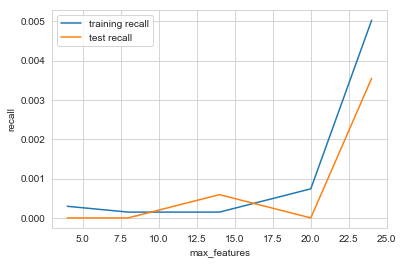

In [136]:
rfgs.fit(X_train_pca,y_train)
plot_traintestAcc(rfgs.cv_results_,'max_features')

#### Tuning min_sample_leaf

In [137]:
parameters = {'min_samples_leaf': range(100, 400, 50)}
rf4 = RandomForestClassifier(max_depth=15,n_estimators=80,max_features=14,random_state=10)
rfgs = GridSearchCV(rf4, parameters, 
                    cv=3, 
                   scoring="recall",
                   return_train_score=True)

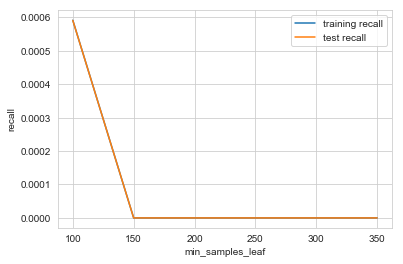

In [138]:
rfgs.fit(X_train_pca,y_train)
plot_traintestAcc(rfgs.cv_results_,'min_samples_leaf')

#### Tuning min_sample_split

In [139]:
parameters = {'min_samples_split': range(50, 300, 50)}
rf5 = RandomForestClassifier(max_depth=15,n_estimators=80,max_features=5,min_samples_leaf=100,random_state=10)
rfgs = GridSearchCV(rf5, parameters, 
                    cv=3, 
                   scoring="recall",
                   return_train_score=True)

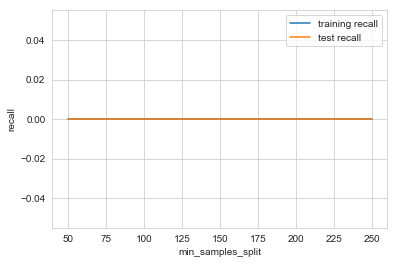

In [140]:
rfgs.fit(X_train_pca,y_train)
plot_traintestAcc(rfgs.cv_results_,'min_samples_split')

In [141]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [5,10,15],
    'min_samples_leaf': range(50, 200, 50),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [50,100,200], 
    'max_features': [5, 14, 15]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [142]:
# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 486 out of 486 | elapsed: 14.4min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [5, 10, 15], 'min_samples_leaf': range(50, 200, 50), 'min_samples_split': range(200, 500, 200), 'n_estimators': [50, 100, 200], 'max_features': [5, 14, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [143]:
# printing the optimal accuracy score and hyperparameters
print('We can get score of',grid_search.best_score_,'using',grid_search.best_params_)

We can get score of 0.9196666666666666 using {'max_depth': 10, 'max_features': 15, 'min_samples_leaf': 50, 'min_samples_split': 200, 'n_estimators': 200}


In [144]:
# Create the parameter grid based on the results of random search 
param_grid1 = {
    'max_depth': [10],
    'min_samples_leaf': range(20, 110, 30),
    'min_samples_split': range(50, 300, 50),
    'n_estimators': [30,50,60,80], 
    'max_features': [14]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search1 = GridSearchCV(estimator = rf, param_grid = param_grid1, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [145]:
# Fit the grid search to the data
grid_search1.fit(X_train_pca, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   43.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  3.7min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [10], 'min_samples_leaf': range(20, 110, 30), 'min_samples_split': range(50, 300, 50), 'n_estimators': [30, 50, 60, 80], 'max_features': [14]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [146]:
# printing the optimal accuracy score and hyperparameters
print('We can get score of',grid_search1.best_score_,'using',grid_search1.best_params_)

We can get score of 0.9212380952380952 using {'max_depth': 10, 'max_features': 14, 'min_samples_leaf': 20, 'min_samples_split': 50, 'n_estimators': 50}


In [147]:
param_grid2 = {
    'max_depth': [5,10],
    'min_samples_leaf': range(5,20,5),
    'min_samples_split': range(10, 150, 20),
    'n_estimators': [50,60,80,100,120], 
    'max_features': [14]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search2 = GridSearchCV(estimator = rf, param_grid = param_grid2, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [148]:
# Fit the grid search to the data
grid_search2.fit(X_train_pca, y_train)

Fitting 3 folds for each of 210 candidates, totalling 630 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 630 out of 630 | elapsed: 17.2min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [5, 10], 'min_samples_leaf': range(5, 20, 5), 'min_samples_split': range(10, 150, 20), 'n_estimators': [50, 60, 80, 100, 120], 'max_features': [14]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [149]:
# printing the optimal accuracy score and hyperparameters
print('We can get score of',grid_search2.best_score_,'using',grid_search2.best_params_)

We can get score of 0.922047619047619 using {'max_depth': 10, 'max_features': 14, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 80}


### Tunned Random Forest

In [150]:
rf_final = RandomForestClassifier(max_depth=10,
                                  n_estimators=50,
                                  max_features=14,
                                  min_samples_leaf=5,
                                  min_samples_split=10,
                                  random_state=10)

In [151]:
print("Model performance on Train data:")
modelfit(rf_final,X_train_pca,y_train)

Model performance on Train data:

Model Report
Accuracy : 0.6702
Recall/Sensitivity : 0.3406
AUC Score (Train): 0.975843
CV Score : Mean - 0.8695965 | Std - 0.0129677 | Min - 0.8549369 | Max - 0.888707


In [152]:
# predict on test data
predictions = rf_final.predict(X_test_pca)

In [153]:
print("Model performance on Test data:")
getModelMetrics(y_test,predictions)

Model performance on Test data:
Roc_auc_score : 0.5494547731588091
Sensitivity/Recall : 0.10266666666666667
Specificity: 0.9962428796509514
False Positive Rate: 0.0037571203490486
Positive predictive value: 0.7129629629629629
Negative Predictive value: 0.92432250084336
sklearn precision score value: 0.7129629629629629


### After hyperparameter tuning for the random forest. The Recall rate(Test) is 10.3%.

In [154]:
# predicting churn with default cut-off 0.5
cut_off_prob=0.5
y_train_df = predictChurnWithProb(rf_final,X_train_pca,y_train,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.6702098453673779
Sensitivity/Recall : 0.34062684801892373
Specificity: 0.999792842715832
False Positive Rate: 0.00020715728416800455
Positive predictive value: 0.993103448275862
Negative Predictive value: 0.9453966699314398
sklearn precision score value: 0.993103448275862


,churn,churn_Prob,final_predicted
11785,0,0.099743,0
11987,0,0.009338,0
11648,0,0.031184,0
12890,0,0.126508,0
3762,0,0.008205,0


     prob  accuracy     sensi     speci
0.0   0.0  0.080524  1.000000  0.000000
0.1   0.1  0.875571  0.946186  0.869387
0.2   0.2  0.949857  0.841514  0.959345
0.3   0.3  0.966000  0.717918  0.987726
0.4   0.4  0.961810  0.557658  0.997203
0.5   0.5  0.946714  0.340627  0.999793
0.6   0.6  0.931571  0.150207  1.000000
0.7   0.7  0.921333  0.023063  1.000000
0.8   0.8  0.919571  0.001183  1.000000
0.9   0.9  0.919476  0.000000  1.000000


<Figure size 720x720 with 0 Axes>

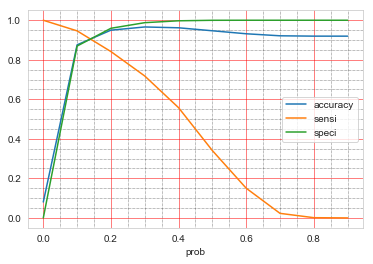

In [155]:
# finding cut-off with the right balance of the metrices
findOptimalCutoff(y_train_df)

**From the curve above, 0.14 is the optimal point with high enough sensitivity.**

In [156]:
cut_off_prob=0.14
predictChurnWithProb(rf_final,X_train_pca,y_train,cut_off_prob)

Roc_auc_score : 0.9128045160777972
Sensitivity/Recall : 0.9077468953282082
Specificity: 0.9178621368273862
False Positive Rate: 0.0821378631726138
Positive predictive value: 0.4918295418135213
Negative Predictive value: 0.9912746797919346
sklearn precision score value: 0.4918295418135213


,churn,churn_Prob,final_predicted
11785,0,0.099743,0
11987,0,0.009338,0
11648,0,0.031184,0
12890,0,0.126508,0
3762,0,0.008205,0
10072,0,0.015312,0
15584,0,0.104515,0
5067,0,0.019484,0
16450,0,0.014829,0
10103,0,0.063519,0


In [157]:
y_test_df= predictChurnWithProb(rf_final,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.8033405243808832
Sensitivity/Recall : 0.7253333333333334
Specificity: 0.8813477154284329
False Positive Rate: 0.11865228457156708
Positive predictive value: 0.3571897570584373
Negative Predictive value: 0.972452527413747
sklearn precision score value: 0.3571897570584373


,churn,churn_Prob,final_predicted
6102,1,0.224966,1
2539,1,0.099123,0
21576,0,0.025290,0
19574,0,0.018670,0
12804,1,0.135584,0


### <font color=blue> Final model after Random Forest (with optimal cutoff setting).</font>
- **train sensitivity  :** 90.77%, **train roc auc score  :** 91.28%  , ** Specificity : ** 91.78%
- **test sensitivity   :** 72.53%, **test roc auc score  :** 80.33%  , ** Specificity : ** 88.13%

### Boosing models

###### Applying Gradiant boosting Classifier on our principal components with Hyperparameter tuning

In [158]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
# Fitting the default GradientBoostingClassifier
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, X_train_pca, y_train)


Model Report
Accuracy : 0.6759
Recall/Sensitivity : 0.3596
AUC Score (Train): 0.923650
CV Score : Mean - 0.8833421 | Std - 0.01084059 | Min - 0.866081 | Max - 0.8959165


In [159]:
# Hyperparameter tuning for n_estimators
param_test1 = {'n_estimators':range(20,150,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='f1',n_jobs=4,iid=False, cv=3)
gsearch1.fit(X_train_pca, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_sa...      subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'n_estimators': range(20, 150, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [160]:
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 130}, 0.3735858374480155)

In [161]:
# Hyperparameter tuning for max_depth and min_sample_split
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=130, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='f1',n_jobs=4,iid=False, cv=3)
gsearch2.fit(X_train_pca, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sam...      subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'max_depth': range(5, 16, 2), 'min_samples_split': range(200, 1001, 200)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [162]:
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 9, 'min_samples_split': 1000}, 0.38327707531319605)

In [163]:
# Hyperparameter tuning for min_sample_leaf
param_test3 = {'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=130,max_depth=9,min_samples_split=1000, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='f1',n_jobs=4,iid=False, cv=3)
gsearch3.fit(X_train_pca, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=9,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sam...      subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'min_samples_leaf': range(30, 71, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [164]:
gsearch3.best_params_, gsearch3.best_score_

({'min_samples_leaf': 60}, 0.372840033242342)

In [165]:
# Hyperparameter tuning for max_features
param_test4 = {'max_features':range(7,20,2)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=130,max_depth=9, min_samples_split=1000, min_samples_leaf=60, subsample=0.8, random_state=10),
param_grid = param_test4, scoring='f1',n_jobs=4,iid=False, cv=3)
gsearch4.fit(X_train_pca, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=9,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=60, min_samp...      subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'max_features': range(7, 20, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [166]:
gsearch4.best_params_, gsearch4.best_score_

({'max_features': 13}, 0.38566004260136694)

########### Tunned GradientBoostingClassifier

In [167]:
# Tunned GradientBoostingClassifier
gbm_final = GradientBoostingClassifier(learning_rate=0.1, n_estimators=130,max_features=13,max_depth=9, min_samples_split=1000, min_samples_leaf=40, subsample=0.8, random_state=10)
modelfit(gbm_final, X_train_pca, y_train)


Model Report
Accuracy : 0.8061
Recall/Sensitivity : 0.6156
AUC Score (Train): 0.977953
CV Score : Mean - 0.8893981 | Std - 0.01123264 | Min - 0.8710099 | Max - 0.9025247


In [168]:
# predictions on Test data
dtest_predictions = gbm_final.predict(X_test_pca)

In [169]:
# model Performance on test data
getModelMetrics(y_test,dtest_predictions)

Roc_auc_score : 0.6538190926352362
Sensitivity/Recall : 0.32266666666666666
Specificity: 0.9849715186038056
False Positive Rate: 0.0150284813961944
Positive predictive value: 0.6612021857923497
Negative Predictive value: 0.9411696583671106
sklearn precision score value: 0.6612021857923497


In [170]:
# predicting churn with default cut-off 0.5
cut_off_prob=0.5
y_train_df = predictChurnWithProb(gbm_final,X_train_pca,y_train,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8060969843393809
Sensitivity/Recall : 0.615612063867534
Specificity: 0.9965819048112279
False Positive Rate: 0.003418095188772075
Positive predictive value: 0.940379403794038
Negative Predictive value: 0.9673251897652441
sklearn precision score value: 0.940379403794038


,churn,churn_Prob,final_predicted
11785,0,0.043469,0
11987,0,0.004571,0
11648,0,0.014002,0
12890,0,0.010316,0
3762,0,0.004607,0


     prob  accuracy     sensi     speci
0.0   0.0  0.080524  1.000000  0.000000
0.1   0.1  0.899952  0.939089  0.896525
0.2   0.2  0.947190  0.868125  0.954115
0.3   0.3  0.962810  0.797161  0.977316
0.4   0.4  0.967476  0.717327  0.989383
0.5   0.5  0.965905  0.615612  0.996582
0.6   0.6  0.957905  0.483737  0.999430
0.7   0.7  0.942095  0.281490  0.999948
0.8   0.8  0.927619  0.101124  1.000000
0.9   0.9  0.919952  0.005914  1.000000


<Figure size 720x720 with 0 Axes>

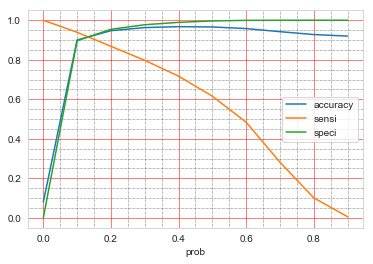

In [171]:
findOptimalCutoff(y_train_df)

In [172]:
cut_off_prob=0.14
predictChurnWithProb(gbm_final,X_train_pca,y_train,cut_off_prob)

Roc_auc_score : 0.9189222865864218
Sensitivity/Recall : 0.9095209934949734
Specificity: 0.9283235796778704
False Positive Rate: 0.07167642032212958
Positive predictive value: 0.5263518138261465
Negative Predictive value: 0.9915366744108861
sklearn precision score value: 0.5263518138261465


,churn,churn_Prob,final_predicted
11785,0,0.043469,0
11987,0,0.004571,0
11648,0,0.014002,0
12890,0,0.010316,0
3762,0,0.004607,0
10072,0,0.003789,0
15584,0,0.046750,0
5067,0,0.002613,0
16450,0,0.027017,0
10103,0,0.057907,0


### **Making prediction on test**

In [173]:
y_test_df= predictChurnWithProb(gbm_final,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.8108540378943967
Sensitivity/Recall : 0.7133333333333334
Specificity: 0.9083747424554599
False Positive Rate: 0.09162525754454005
Positive predictive value: 0.4144074360960496
Negative Predictive value: 0.9721141374837873
sklearn precision score value: 0.4144074360960496


,churn,churn_Prob,final_predicted
6102,1,0.107988,0
2539,1,0.129416,0
21576,0,0.016993,0
19574,0,0.017746,0
12804,1,0.119205,0


##### <font color=blue> Final model after Gradient Boosting (with optimal cutoff setting).</font>
- **train sensitivity  :** 90.95%, **train roc auc score  :** 91.89%  , ** Specificity : ** 91.78%
- **test sensitivity   :** 71.33%, **test roc auc score  :** 81.08%  , ** Specificity : ** 92.83%

###### Applying XGBoost Classifier on our principal components with Hyperparameter tuning

In [176]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
# Fitting the XGBClassifier
xgb1 = XGBClassifier(learning_rate =0.1,
                    n_estimators=1000,
                    max_depth=5,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective= 'binary:logistic',
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27)

In [ ]:
# Model fit and performance on Train data
modelfit(xgb1, X_train_pca, y_train)


Model Report
Accuracy : 1
Recall/Sensitivity : 1
AUC Score (Train): 1.000000
CV Score : Mean - 0.8839257 | Std - 0.0105492 | Min - 0.8672806 | Max - 0.8938863


In [ ]:
# Hyperparameter tunning for the XGBClassifer
param_test1 = {'max_depth':range(3,10,2),'min_child_weight':range(1,6,2)}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=130, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='f1',n_jobs=4,iid=False, cv=3)
gsearch1.fit(X_train_pca, y_train)

In [ ]:
gsearch1.best_params_, gsearch1.best_score_

In [ ]:
# Some more hyperparameter tunning for the XGBClassifer
param_test2 = param_test3 = {'gamma':[i/10.0 for i in range(0,5)]}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=130, max_depth=7,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='f1',n_jobs=4,iid=False, cv=3)
gsearch2.fit(X_train_pca, y_train)

In [ ]:
gsearch2.best_params_, gsearch2.best_score_

In [ ]:
# Final XGBClassifier
xgb2 = XGBClassifier( learning_rate=0.1, n_estimators=130, max_depth=7,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)

In [ ]:
# Fit Train data
modelfit(xgb2, X_train_pca, y_train)

In [ ]:
# Prediction on Test data
dtest_predictions = xgb2.predict(X_test_pca)

In [ ]:
# Model evaluation on Test data
getModelMetrics(y_test,dtest_predictions)

In [ ]:
# predicting churn with default cut-off 0.5
cut_off_prob=0.5
y_train_df = predictChurnWithProb(xgb2,X_train_pca,y_train,cut_off_prob)
y_train_df.head()

In [ ]:
# Finding optimal cut-off probability
findOptimalCutoff(y_train_df)

In [ ]:
# Selecting 0.19 as cut-off in an attempt to improve recall rate
cut_off_prob=0.19
predictChurnWithProb(xgb2,X_train_pca,y_train,cut_off_prob)

### **Making prediction on test**

In [ ]:
y_test_df= predictChurnWithProb(xgb2,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

##### <font color=blue> Final model after XG Boosting (with optimal cutoff setting).</font>
- **train sensitivity  :** 97.28%, **train roc auc score  :** 97.27%  , ** Specificity : ** 97.27%
- **test sensitivity   :** 63.87%, **test roc auc score  :** 78.99%  , ** Specificity : ** 94.12%

### Final Choice of Model 

###### Recall or true-positive rate is the most important feature for our churn problem. The company should identify all customers  having any risk of churning. The cost to the company of customers getting churned is much higher than having a few non-churning customers can be classified wrongly as churn due to the focus made on sensitivity. The business goal is to identify churners and not focus on non-churners as the number of churners are very less compared to non-churners.
#### 1. Logistic Regression
##### <font color=red> Final model after PCA and logistic regression </font>
    - **train sensitivity  :** 82.5%, **train roc auc score  :** 82.4%  , ** Specificity : ** 82.3%
    - **test sensitivity   :** 81.8%, **test roc auc score  :** 82.6%  , ** Specificity : ** 83.3%
    
#### 2. Decision Tree
##### <font color=red> Final model after Decison Tree.</font>
    - **train sensitivity  :** 73.9%, **train roc auc score  :** 75.1%  , ** Specificity : ** 76.4%
    - **test sensitivity   :** 70.4%, **test roc auc score  :** 73.3%  , ** Specificity : ** 76.2%
    
#### 3. Random Forest
##### <font color=red> Final model after Random Forest (with optimal cutoff setting).</font>
    - **train sensitivity  :** 90.77%, **train roc auc score  :** 91.28%  , ** Specificity : ** 91.78%
    - **test sensitivity   :** 72.53%, **test roc auc score  :** 80.33%  , ** Specificity : ** 88.13%
    
#### 4. Boosting models - 
  Gradient Boosting Classifier
##### <font color=red> Final model after Gradient Boosting (with optimal cutoff setting).</font>
    - **train sensitivity  :** 90.95%, **train roc auc score  :** 91.89%  , ** Specificity : ** 91.78%
    - **test sensitivity   :** 71.33%, **test roc auc score  :** 81.08%  , ** Specificity : ** 92.83%  
    
  XGBoost Classifier
##### <font color=red> Final model after XG Boosting (with optimal cutoff setting).</font>
    - **train sensitivity  :** 97.28%, **train roc auc score  :** 97.27%  , ** Specificity : ** 97.27%
    - **test sensitivity   :** 63.87%, **test roc auc score  :** 78.99%  , ** Specificity : ** 94.12%

 

##### Based on above data, following is our conclusion.
1. Considering True-Positive rate , logistic regression model done on PCA dataset is best as it has a test sensitivity of 81.8%
2. Random Forest , Gradient Boosting Classifier and XGBoost Classifier are examples of overfitted data.
3. The difference between Test and Train metrics for Decision Tree is as per standard but it's values are less than Random Forest and Gradient Boosting.
4. If we consider the difference in metrics of test and train data , we can easily pick logistic regression model done on PCA data.

### Identifying relevant churn features. 

###### We will use an instance of Random Forest classifier to identify the features most relevant to churn. 

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10,12],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [12, 15, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = 4,verbose = 1)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

In [ ]:
rf = RandomForestClassifier(max_depth=8,
                            max_features=12,
                            min_samples_leaf=100,
                            min_samples_split=200,
                            n_estimators=300,
                            random_state=10)

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
plt.figure(figsize=(15,40))
feat_importances = pd.Series(rf.feature_importances_, index=hv_data.drop(['churn','mobile_number'], axis=1).columns)
feat_importances.nlargest(len(hv_data.drop(['churn','mobile_number'], axis=1).columns)).sort_values().plot(kind='barh', align='center')

In [ ]:
# predictors
features = hv_data.drop(['churn','mobile_number'], axis=1).columns
# feature_importance
importance = rf.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

In [ ]:
# extract top 'n' features
top_n = 20
top_features = feature_importance.variables[0:top_n]

In [ ]:
print(top_features)

### Top Features
#### Top features which will help in identifying customers who are likely to churn belong to month 8 (August) which is Action month. These features relate to usage of customer which shows significant drop and hence attribute to probability of churning.
Following are top 20 features identified -
- total_ic_mou_8 : Total incoming minutes of usage in month-8 (August), refers to incoming calls received
- Total_loc_mou_8 : Total local minutes of usage in month-8 (August), refers to total incoming and outgoing calls
- loc_ic_mou_8 : Local incoming minutes of usage in month-8 (August), refers to local incoming calls received
- loc_ic_t2m_mou_8 : Local incoming minutes of usage from other operator in month-8 (August), refers to local incoming calls received from other operator
- arpu_8 : Average revenue per user in month-8 (August)
- total_rech_amt_8 : Total recharge amount in month-8 (August), total monetary value of recharges done by customer in a month.
- og_to_ic_mou_8 : Ratio of outgoing minutes of usage to incoming minutes of usage, refers to whether customer is making more calls than receiving.
- total_og_mou_8 : Total outgoing minutes of usage in month-8 (August), refers to outgoing calls made by customer
- max_rech_amt_8 : Maximum recharge amount done by customer
- loc_ic_t2t_mou_8 : Local incoming minutes of usage from same operator in month-8 (August), refers to local incoming calls received from same operator
- loc_og_to_ic_mou_8 : Ratio of local outgoing minutes of usage to incoming minutes of usage, refers to whether customer is making more calls than receiving.
- loc_og_mou_8 : Local outgoing minutes of usage in month-8 (August), refers to local outgoing calls made by customer.
- fb_user_8 - Whether customer is Facebook user in month-8 (August)
- loc_og_t2m_mou_8 : Local outgoing minutes of usage to other operator in month-8 (August), refers to local outgoing calls made to other operator
- last_day_rch_amt_8 : Amount of last recharge done in month-8 (August).
- vol_data_mb_8 : Data volume in MB consumed in month-8 (August).
- av_rech_amt_data_8 : Average recharge amount in month-8 (August).
- offnet_mou_8 : All incoming and outgoing minutes of usage with other operator, refers to incoming and outgoing calls usage with other operator.
- max_rech_data_8 : Maximum data recharge done in month-8 (August)
- loc_og_t2t_mou_8 : Local outgoing minutes of usage to same operator in month-8 (August), refers to local outgoing calls made to same operator
#### <font color=red>If we carefully evaluate features above we will notice maximum emphasize is on minutes of usage incoming/outgoing than any other feature. If we see any dip or abrupt trend in customers minutes of usage than that should flag customer likelihood for churn.</font>

### Strategies to manage customer churn
Strategy should be divided in four segments - 

	Minutes of usage
	Data usage
	Recharge trend
	Roaming usage

##### Minutes of usage - 
    Customers with high minutes of usage should be provided with perks for being customer of the network, they should get some bonus or surprise offers which will keep them lucrative towards the network. 
##### Data Usage - 
    Data extensive customers should be given an option to opt for data and may be with extra data during off-peak hours. May be options of quick data will be good choice
##### Recharge Trend - 
    We need to analyse and provide recharge options which are in alignment to customer choice and favorable to them for use. Quick small top-ups in case they are running out of minutes or data will be good strategy.
##### Roaming Usage - 
    we have seen high churn for customers who are roaming customers, we need to give them economic options during roaming so that the don't tend to move to other attributes. We need to be competitive in market with roaming prices and give less room to customer to switch.